# Deep Learning
## Logistic regression:

Download the Iris data and explore it, (visualize it, how many classes, 
instances, features, etc.. Select feature number 0 and 2 and the first
100 samples and do the following analysis: 

1. Implement the logistic regression model that discussed in the class (with and
without regularization). Use Gradient descent algorithm for updating the parameters.
Plot the results.

2. Explore the influence of learning rate on the convergence of the model.
Tune the learning rate.

3. Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 
and 3. and compare the results.

4. Give the option to the users to select whatever combination of features they
want and your code will do the rest.

5.  Try your model on Monk2 dataset and report the results, (test accuracy, 
training accuracy, optimal learning rate, loss value.. Use the last 20% of the
data as test.


For main results and discussion, please read the PDF that we provide.

In [5]:
import math
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from scipy.io import loadmat
from sklearn import preprocessing

Download the dataset and explore the content. The features 0 and 2 will be used.
The dataset contains three different classes:

- Iris-setosa
- Iris-versicolor
- Iris-virginica


In [6]:
df = pd.read_csv('data/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
print(np.unique(df[4].values))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


We can see that the dataset is composed by instances described by four features
and that belong to a class. As it can be seen in the previous cell, there are
three possible classes.

In [8]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In the previous table, some data of the different columns of the dataset can
be seen, that are the features of the data.
The dataset contains 150 instances which all are complete, this is, there are not
any missing data.

In the following cell, some of the features in the dataset are plot, to have an 
overview. In this case, the first plot will represent features 0 and 2, the
second, features 1 and 3 and the last one, features 2 and 3.

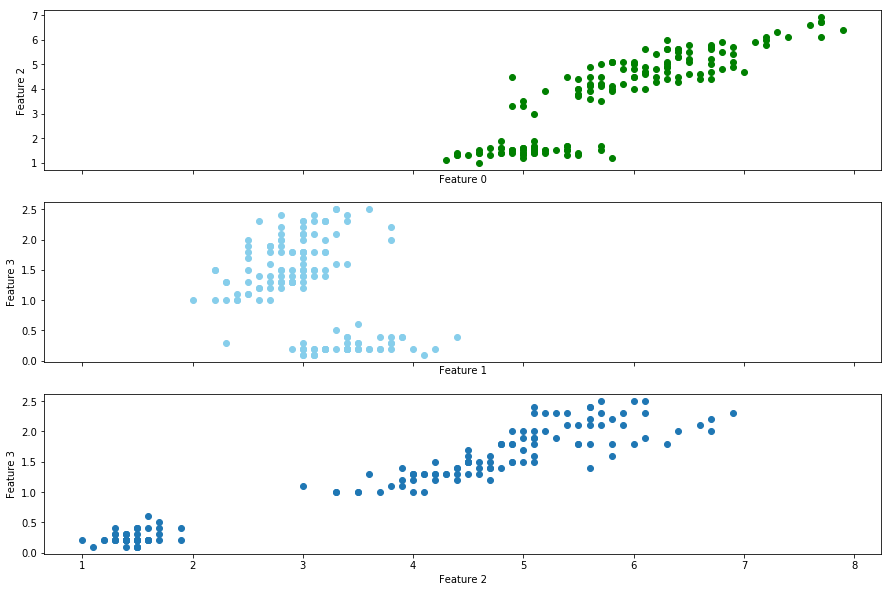

In [9]:
rcParams['figure.figsize'] = 15, 10 #To give a bigger plot

x1=df.loc[:,0]
y1=df.loc[:,2]

x2=df.loc[:,1]
y2=df.loc[:,3]

x3=df.loc[:,2]
y3=df.loc[:,3]

fig, axs = plt.subplots(3, 1, sharex='all')

# Plot each graph, and manually set the y tick values
axs[0].plot(x1, y1, 'o', color='g')
axs[0].set_ylabel('Feature 2')
axs[0].set_xlabel('Feature 0')

axs[1].plot(x2, y2, 'o',color='skyblue')
axs[1].set_ylabel('Feature 3')
axs[1].set_xlabel('Feature 1')

axs[2].plot(x3, y3,'o')
axs[2].set_ylabel('Feature 3')
axs[2].set_xlabel('Feature 2')

plt.show()

## Part 1
Implement the logistic regression model that discussed in the class
(with and without regularization). Use Gradient descent algorithm
for updating the parameters. Plot the results.

First, we are going to create the dataset that we are going to use
in this part. It will generated using the features number 0 and 2 with
the objective of predicting the output class.

The full code of this assignment can be found in the file `logistic_regression.py`
whose instructions of how to use are written in the `readme.txt` file. However, some
of the method will be explained in this notebook and used in some examples. 

In [10]:
# Method to generate the data to use from the dataset

def generate_data_with_features(data: pd.DataFrame, features: List[int], elements: int = None,
                                normalise: bool = True, test_elements: int = 0) -> \
        Tuple[Tuple[pd.DataFrame, pd.DataFrame], Tuple[pd.DataFrame, pd.DataFrame]]:
    """
    Method to obtain a dataset with the features and the size desired. This
    method return the data and the class that belongs to it. If test data is desired
    the method will return two different tuples, both containing a dataframe with the
    features and other with the class.

    To retrieve correctly the data of the method, the following examples should be
    followed:

    ```
    train, test = generate_data_with_features(...)
    ```

    or

    ```
    train_x, train_y, test_x, test_y = generate_data_with_features(...)
    ```

    Normalisation are made in column by column style, using only numeric columns.

    :param data: dataframe with the original data
    :param features: list with the column name of the features
    :param elements: number of elements, when not specified the full dataset will be used
    :param normalise: flag to normalise the data
    :param test_elements: int with the number of rows to be used as test
    :return: dataframes with the new data with the desired characteristics
    """
    if elements is None:  # take full data
        elements = len(data)

    train_x = data[features][:elements]
    train_y = data.iloc[:, -1][:elements]

    if normalise:
        for i in features:
            column = train_x[i].values.reshape(-1, 1)
            if column.dtype == np.float64 or column.dtype == np.int64:
                min_max_scaler = preprocessing.MinMaxScaler()
                scaled_column = min_max_scaler.fit_transform(column)
                train_x[i] = scaled_column.reshape(-1)

    le = preprocessing.LabelEncoder()  # transform the class to 0 and 1
    train_y = le.fit_transform(train_y)

    test_x = None
    test_y = None
    if test_elements != 0 and elements > test_elements:
        train_elements = elements - test_elements
        test_x = train_x[train_elements:]
        train_x = train_x[:train_elements]
        test_y = train_y[train_elements:]
        train_y = train_y[:train_elements]

    return (pd.DataFrame(train_x).T, pd.DataFrame(train_y).T), (pd.DataFrame(test_x).T, pd.DataFrame(test_y).T)

This method generates the required data to train the logistic regression model, returning
a dataframe with the features of the data and other with the class. Therefore, for the
same row the first dataset will have the values for a given instance and the second the
class.

This method allow the normalization of the features, to improve the learning process and,
if specified,it generates the test dataset, with the same characteristics as the training one.

For the iris dataset, only the first 100 instances will be selected, in this first case using
the features 0 and 2. We will normalize the features.

In [11]:
train, test = generate_data_with_features(df, elements=100, features=[0, 2], normalise=True)

The following methods will be used to train the logistic regression model, using the
data previously generated.

In [12]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    """
    The sigmoid function that applies to the result of the product of the weight and the activation of the
    neurons plus the biases, known as weighted input.
    z = w_l*a_l+b

    :param z: weighted input.
    :return: activation of the next layer of the network
    """
    return 1.0 / (1 + np.exp(-z))


def forward_pass(x: np.ndarray, weights: np.ndarray, bias: float) -> np.ndarray:
    """
    Method that calculates the activation of the sigmoid function
    from a given input, weights and biases.

    :param x: input data
    :param weights: tuple with the weights
    :param bias: value of the biases
    :return: activation of the model for each row of the input
    """
    weighted_input = np.dot(weights, x) + bias
    return sigmoid(weighted_input)


def calculate_derivatives(x: np.ndarray, y: np.ndarray, weights: np.ndarray, bias: float,
                          regularization_term: float = 0) -> Tuple[float, np.ndarray, np.ndarray]:
    """
    Method that propagates the input and calculates the cost and the derivative of the
    weights and the biases.

    :param x: features of the data
    :param y: classes of the data
    :param weights: weights of the model
    :param bias: bias of the model
    :param regularization_term: value of lambda
    :return: tuple with the cost, the derivative of the weights and bias
    """
    n_samples = y.shape[1]
    activation = forward_pass(x, weights, bias)
    cost = np.mean(-y * np.log(activation) - (1 - y) * np.log(1 - activation))
    cost = cost + regularization_term / (2 * n_samples) * np.dot(weights.T, weights)  # lambda/2m*sum(theta^2)
    dz = -(y - activation) / n_samples
    dw = np.dot(dz, x.T).squeeze()
    db = np.sum(dz)
    return cost, dw, db


def train_model(train_data: Tuple[pd.DataFrame, pd.DataFrame], epochs: int, learning_rate: float = 0.5,
                regularization_term: float = 0) -> Tuple[np.ndarray, float, np.ndarray]:
    """
    Method to train the model

    :param train_data: training data, with the features and the outputs
    :param epochs: number of epochs to train the model
    :param learning_rate: value of the learning rate, alpha
    :param regularization_term: value of the regularization term, lambda
    :return: weights and bias of the trained model. List of the costs during training
    """
    x, y = train_data  # extract the data and the classes
    n_samples = y.shape[1]
    costs = list()
    bias = 1
    weights = np.random.uniform(low=-0.7, high=0.7, size=x.shape[0])
    for epoch in range(epochs):
        cost, dw, db = calculate_derivatives(x=x.to_numpy(), y=y.to_numpy(), weights=weights,
                                             bias=bias, regularization_term=regularization_term)
        if epoch % 1000 == 0:
            print('The cost in epoch {0} was {1}'.format(epoch, cost))
        costs.append(cost)
        weights -= learning_rate * (dw + regularization_term / n_samples * weights)
        bias -= learning_rate * (db + regularization_term / n_samples * bias)
    print('Finished training, trained during {0} epochs'.format(epochs))
    return weights, bias, np.array(costs)

For getting outputs and testing we implement the following methods:

In [13]:
def predict(x: np.ndarray, weights: np.ndarray, bias: float) -> np.ndarray:
    """
    Method that outputs the system response
    of a given input, weights and biases.

    :param x: input data
    :param weights: tuple with the weights
    :param bias: value of the biases
    :return: output of the system for each row of the input
    """
    activation = forward_pass(x, weights, bias)
    return 1 * (activation > 0.5)


def test_model(test_data: Tuple[pd.DataFrame, pd.DataFrame], weights: np.ndarray,
               bias: float) -> float:
    """
    Method that calculates the accuracy given a test dataset.

    :param test_data: test data, with the features and the outputs
    :param weights: weights of the trained model
    :param bias: bias of the trained model
    :return: accuracy in the data
    """
    x, y = test_data
    predicted_y = predict(x.to_numpy(), weights, bias)
    diff_pred_real = abs(predicted_y - y.to_numpy().squeeze())
    percentage_error = np.count_nonzero(diff_pred_real == 1) / len(diff_pred_real)
    return 1 - percentage_error


def get_prob_and_cost(x: np.ndarray, y: np.ndarray, weights: np.ndarray,
                      bias: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Method that outputs the system response
    of a given input, weights and biases.

    :param x: input data
    :param weights: tuple with the weights
    :param bias: value of the biases
    :return: output of the system
    """
    activation: np.ndarray = forward_pass(x, weights, bias)
    cost: np.ndarray = -y * np.log(activation) - (1 - y) * np.log(1 - activation)
    return activation, cost.squeeze()

And for plotting the data and the results:

In [14]:
def plot_with_different_rates(train_data: Tuple[pd.DataFrame, pd.DataFrame], learning_rates: List[float],
                              regularization_terms: List[float], epochs: int = 10000, plot: bool = True) -> None:
    """
    Method that trains and plots the cost of a given training data. This method will save the
    figures in the folder 'images' with a name indicating the features used and the regularization
    term used.

    :param train_data: data to train the model, with features and class
    :param learning_rates: list of the learning rates to test
    :param regularization_terms: list of regularization rates to test
    :param epochs: number of epochs to train each combination
    :param plot: flag to show in the screen the figure
    """
    for rt in regularization_terms:
        plt.figure()
        features_used = train_data[0].T.columns.values
        features_used = "-".join(repr(i) for i in features_used)
        for lr in learning_rates:
            weights, bias, costs = train_model(train_data, epochs=epochs, learning_rate=lr, regularization_term=rt)
            plt.plot(costs, label='alpha: {0}, lambda: {1}'.format(lr, rt))
            plt.xlabel('Epochs')
            plt.ylabel('Cost')
        plt.title('Training {0} with regularization term {1} and different learning rates'.format(features_used, rt))
        plt.legend()
        plt.savefig('./images/f-{0}_rt-{1}.png'.format(features_used, rt))
        if plot:
            plt.show()
        else:
            plt.close()


def plot_features_combinations(data: pd.DataFrame, elements: int, learning_rates: List[float],
                               regularization_terms: List[float], epochs: int = 10000,
                               test_elements: int = 0, plot: bool = False) -> None:
    """
    Method that uses all possible binary combination of parameters to train different logistic regressions
    using different learning rates and regularization rates.

    :param data: data to train the model, full dataframe
    :param elements: number of elements that will be used to train
    :param learning_rates: list of the learning rates to test
    :param regularization_terms: list of regularization rates to test
    :param epochs: number of epochs to train each combination
    :param test_elements: number of rows to be used as test
    :param plot: flag to show in the screen the figure
    """
    num_features = len(data.columns.values) - 1  # remove class
    for i in range(num_features):
        for j in range(i + 1, num_features):
            train, test = generate_data_with_features(data, features=[i, j], elements=elements,
                                                      test_elements=test_elements)
            plot_with_different_rates(train, epochs=epochs, learning_rates=learning_rates,
                                      regularization_terms=regularization_terms, plot=plot)


def plot_boundary(x: np.ndarray, y: np.ndarray, weights: np.ndarray,
                  bias: float, str_id: str, plot: bool = True) -> None:
    """
    Method that plot the data and the decision boundary of a given
    logistic regression model, using the bias term and the weights.

    :param x: features of the data
    :param y: classes of the data
    :param weights: weights of the model
    :param bias: bias of the model
    :param plot: flag to show the figure in the screen
    """
    # get the indexes of each class
    zero = np.where(y == 0)[1]
    one = np.where(y == 1)[1]

    plt.figure()
    plt.scatter(x[0][zero], x[1][zero], s=10, label='Class 0')
    plt.scatter(x[0][one], x[1][one], s=10, label='Class 1')

    # decision boundary
    x_values = [np.min(x[0, :]), np.max(x[0, :])]
    y_values = - (bias + np.dot(weights[0], x_values)) / weights[1]
    plt.plot(x_values, y_values, label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    if str_id is None:
        str_id = "-".join(repr(i) for i in weights)

    plt.savefig('./images/boundary-{0}.png'.format(str_id))

    if plot:
        plt.show()
    else:
        plt.close()

The main method will be `train_model` that will use the training data and will require
the number of training epochs, the learning rate and the regularization term. It will
return the weights and bias for the model trained along with an array with the cost
during training. The method `predict` can be used to calculate the output for a given input, weight and
bias.

Firstly, we are going to train the model with the Iris data generated previously, using
the features 0 and 2, with a learning rate of 0.4 and a weight decay of 0.2.

In [15]:
weights, bias, costs = train_model(train, epochs=2000, learning_rate=0.4, regularization_term=0.2)
print('The accuracy in the train is {0}'.format(test_model(train, weights, bias)))

The cost in epoch 0 was 0.8101589014725216
The cost in epoch 1000 was 0.1387462753299054
Finished training, trained during 2000 epochs
The accuracy in the train is 1.0


As we can observe, the accuracy for the training data is 1, meaning that the model is
capable of correctly classify every instance in the training set.

Now, we try different values of learning rates for Gradient Descent (alphas) and
regularization terms (lambdas), plotting the results of the cost for features 0 and 2.  

The cost in epoch 0 was 0.8107878436188993
The cost in epoch 1000 was 0.12807926505474457
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8667327182056698
The cost in epoch 1000 was 0.07564412361488969
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7890509252319627
The cost in epoch 1000 was 0.05252968018599678
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7807895557908644
The cost in epoch 1000 was 0.041167095695878314
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7925998506688281
The cost in epoch 1000 was 0.03445192732298919
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8145623484256481
The cost in epoch 1000 was 0.03042240314128015
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7989737198022105
The cost in epoch 1000 was 0.026704705475587592
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7798490707725578
The

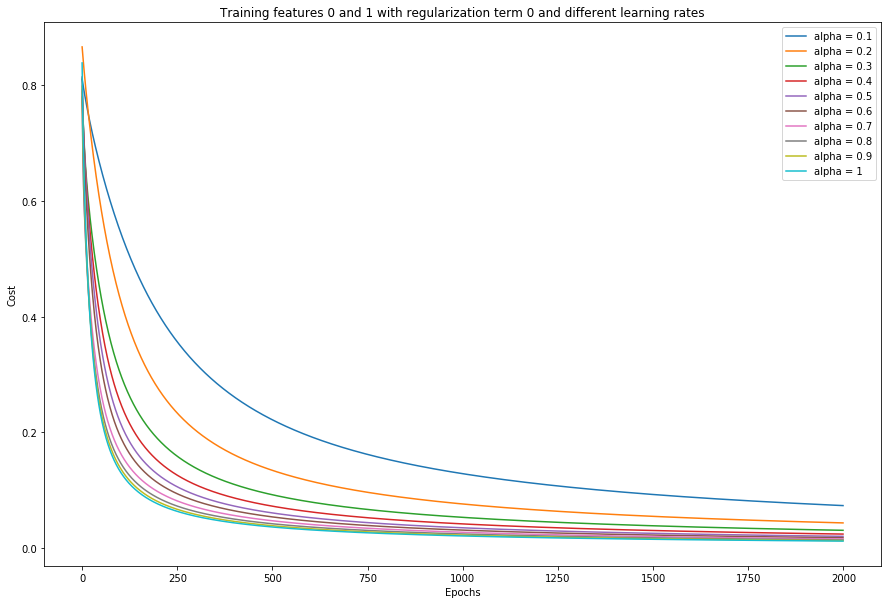

The cost in epoch 0 was 0.7828680536020525
The cost in epoch 1000 was 0.2975217351543653
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8185174398836333
The cost in epoch 1000 was 0.2927598743642639
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8539243678097598
The cost in epoch 1000 was 0.29262046096931876
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8108900617020036
The cost in epoch 1000 was 0.29261916667373866
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8237795830997625
The cost in epoch 1000 was 0.29262883667782347
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7741358599929627
The cost in epoch 1000 was 0.2926364797448416
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8125080682924981
The cost in epoch 1000 was 0.2926357435883379
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8174234655592946
The cost 

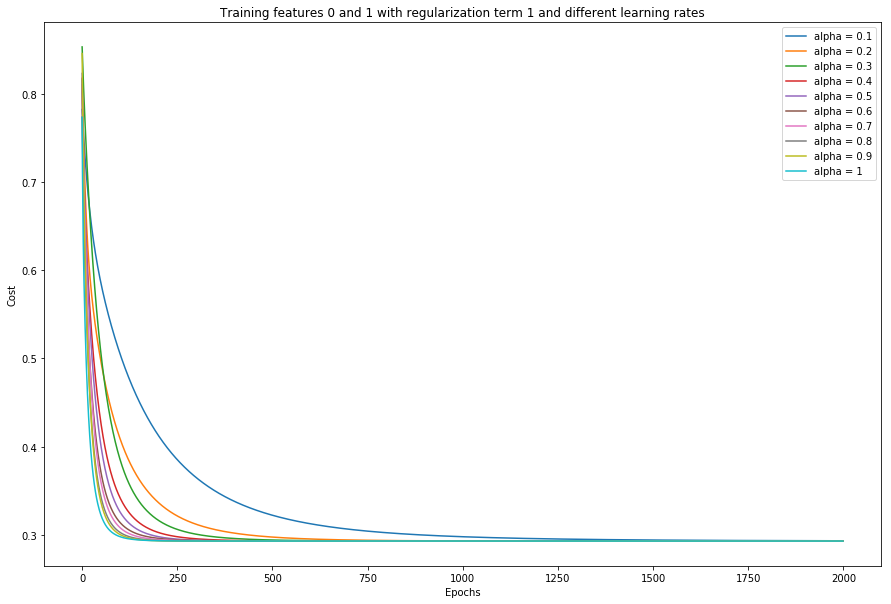

The cost in epoch 0 was 0.8249608310481081
The cost in epoch 1000 was 0.5710664974342287
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8759461410021256
The cost in epoch 1000 was 0.5710664389363932
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8094383437872139
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8227592501010524
The cost in epoch 1000 was 0.5710664389335747
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8646459198119546
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7985118327435892
The cost in epoch 1000 was 0.5710664389335744
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.797160442061274
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7999951376150354
The cost in e

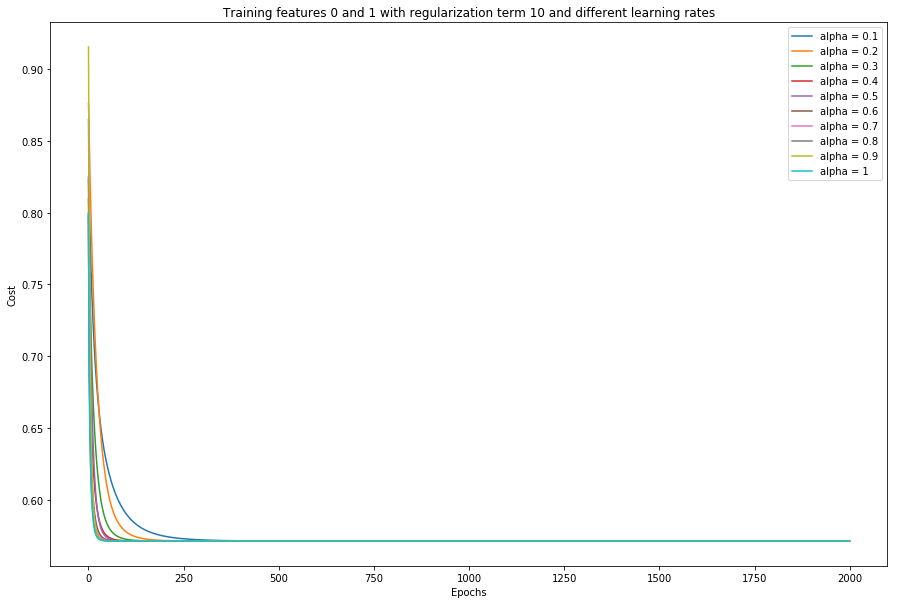

The cost in epoch 0 was 1.0371631643856147
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.913835950280853
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.940238096111845
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0891143508796421
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.1570662551719646
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.1888899029272813
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9298740925284731
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0470357762839062
The cost in ep

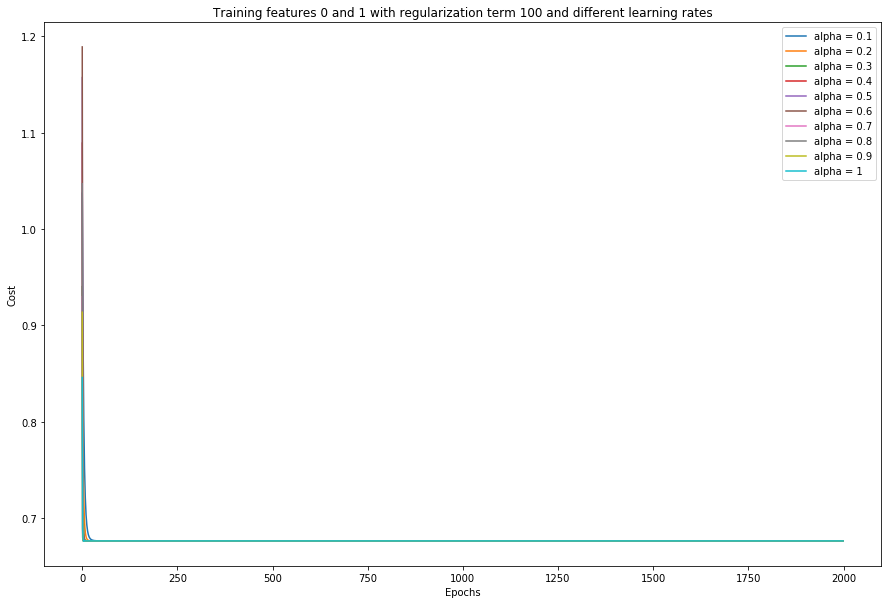

In [16]:
alphas=[0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1]  #Learning rate
lambdas=[0, 1, 10, 100]  #Regularization term
    
for l in lambdas:
    for i in range(0,10):
        weights, bias, costs = train_model(train, epochs=int(2000), learning_rate=alphas[i], regularization_term=l)
        p=plt.plot(costs, label='alpha = '+str(alphas[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
    plt.title('Training features 0 and 1 with regularization term '+str(l)+' and different learning rates')
    plt.legend()
    plt.show()

The bigger the learning rate, the faster it converges to the cost. However, if we add the regularization term, 
then our cost increases to avoid the overfitting of our model and the convergence is much faster. 

In the following cell, we compare our results for different features. The same process
can be done executing the file `cost_iris.sh` that uses the command line implemented
in the python file.

The cost in epoch 0 was 0.8432353802008947
The cost in epoch 1000 was 0.25272384819007
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7785804705871453
The cost in epoch 1000 was 0.16824803673147595
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9361659191127686
The cost in epoch 1000 was 0.13067733760816025
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8688238975932436
The cost in epoch 1000 was 0.10855910855146692
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.792815853811363
The cost in epoch 1000 was 0.09360609334559422
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7254281695750684
The cost in epoch 1000 was 0.08341269229554381
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.739606849225927
The cost in epoch 1000 was 0.07539347525603074
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7838333677186989
The cost i

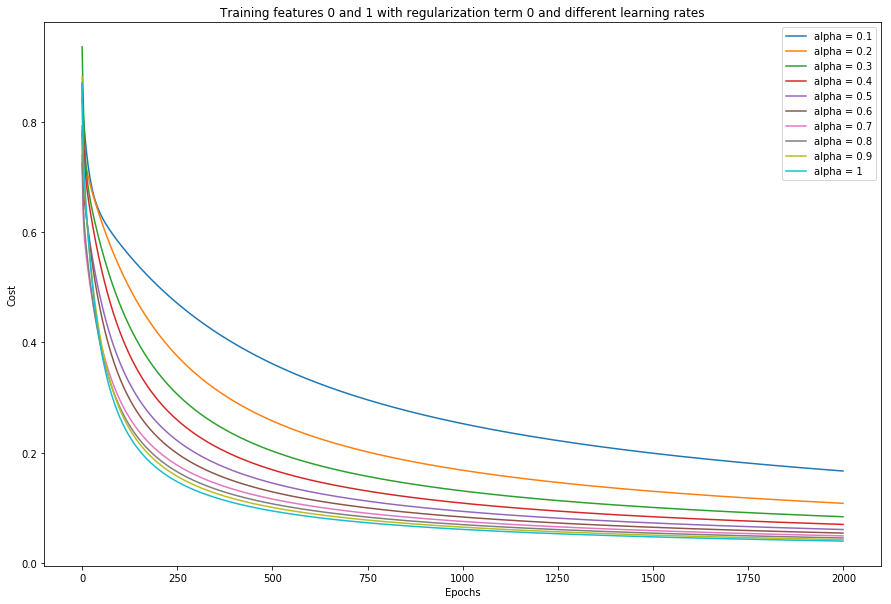

The cost in epoch 0 was 0.8590660645256716
The cost in epoch 1000 was 0.4414573386314065
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8915587521053411
The cost in epoch 1000 was 0.4369261989387729
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9098957997283663
The cost in epoch 1000 was 0.4368424009839469
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7485441916559101
The cost in epoch 1000 was 0.4368414087759561
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9057631857941542
The cost in epoch 1000 was 0.43684118209378775
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.775740568828091
The cost in epoch 1000 was 0.43684125625874404
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7885084252265201
The cost in epoch 1000 was 0.4368412648192338
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.811143853449151
The cost in 

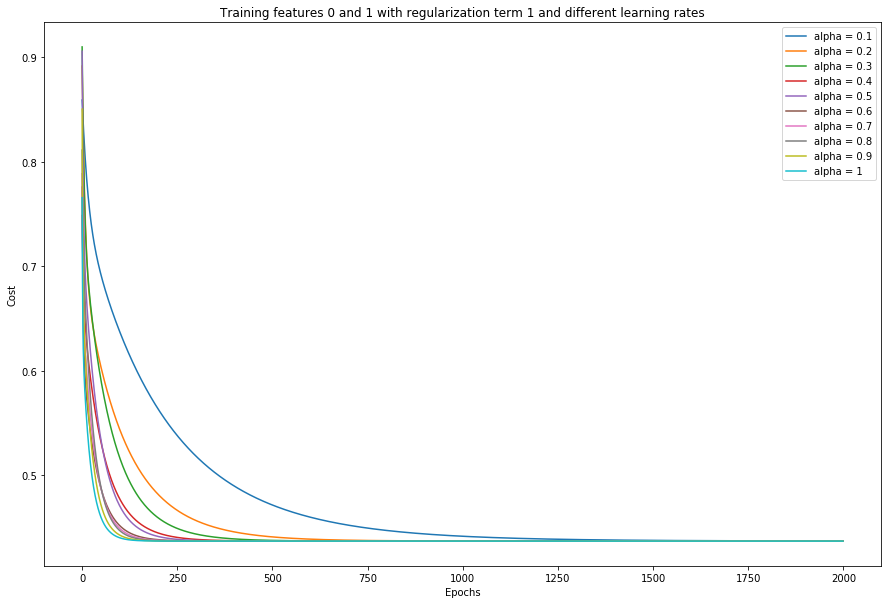

The cost in epoch 0 was 0.7882542467042362
The cost in epoch 1000 was 0.6409133762168148
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7495109197743715
The cost in epoch 1000 was 0.6409133525652465
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7539598977886122
The cost in epoch 1000 was 0.6409133525646021
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8621001063953873
The cost in epoch 1000 was 0.6409133525646021
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8613422648931425
The cost in epoch 1000 was 0.6409133525646021
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9350063221479276
The cost in epoch 1000 was 0.6409133525646021
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8885126137996494
The cost in epoch 1000 was 0.6409133525646021
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7901447864349528
The cost in 

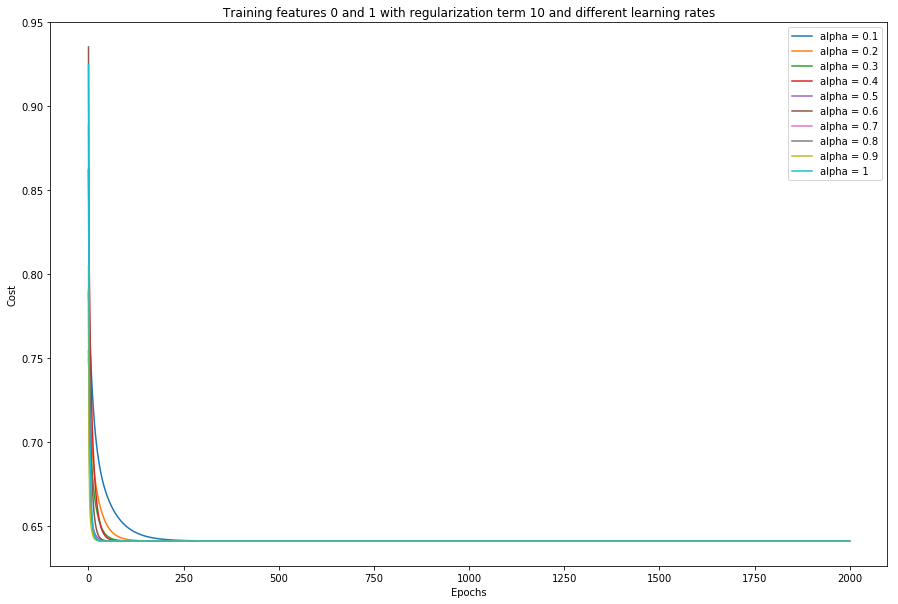

The cost in epoch 0 was 1.0124333922781332
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0098129794736055
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.851488612748768
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9544624203294655
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0169142204552841
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8086208333398327
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8076564191316112
The cost in epoch 1000 was 0.6872507147632364
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9884242317964643
The cost in e

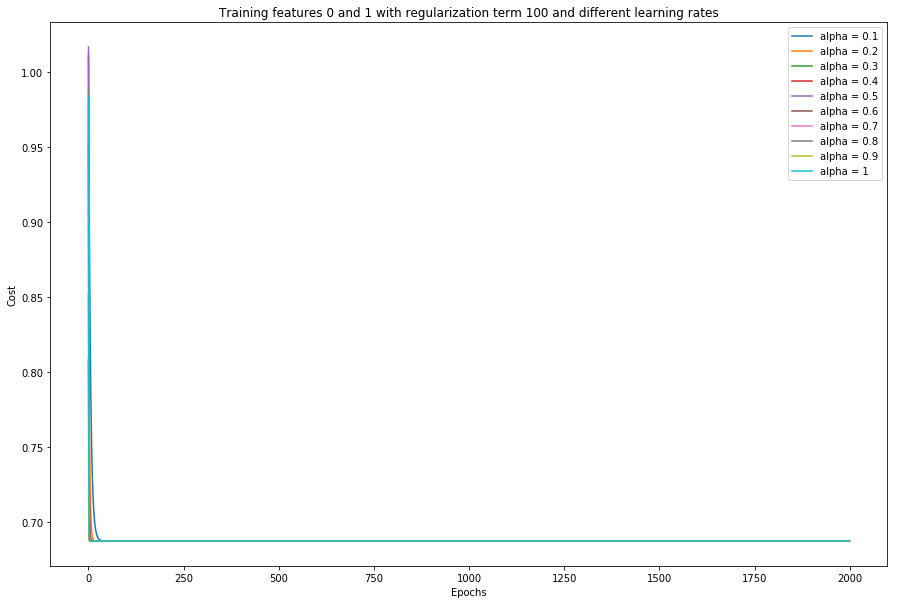

The cost in epoch 0 was 0.800367303449937
The cost in epoch 1000 was 0.1271052815976666
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8145323444441439
The cost in epoch 1000 was 0.07387223528686117
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8751022045766311
The cost in epoch 1000 was 0.05391809984583024
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8029858967762464
The cost in epoch 1000 was 0.042065463210624834
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8096977633548037
The cost in epoch 1000 was 0.03474222043898358
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8412715416557865
The cost in epoch 1000 was 0.03092109119242574
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7867820811455714
The cost in epoch 1000 was 0.026538404703896932
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8301326494349975
The c

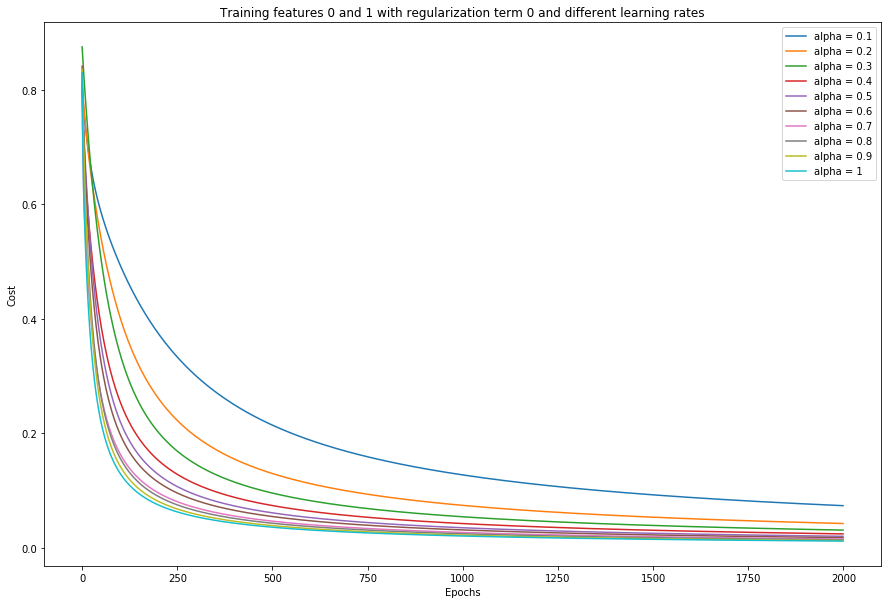

The cost in epoch 0 was 0.8640724491789984
The cost in epoch 1000 was 0.29808862347041576
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8571360800029297
The cost in epoch 1000 was 0.2927790363898174
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8135455199195322
The cost in epoch 1000 was 0.29259691144411276
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.84064422970903
The cost in epoch 1000 was 0.2926121925970656
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8146687229801
The cost in epoch 1000 was 0.29263143678625403
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7938395934304624
The cost in epoch 1000 was 0.29263561009383915
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8486365658020526
The cost in epoch 1000 was 0.29263533624230087
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7989102609301962
The cost in 

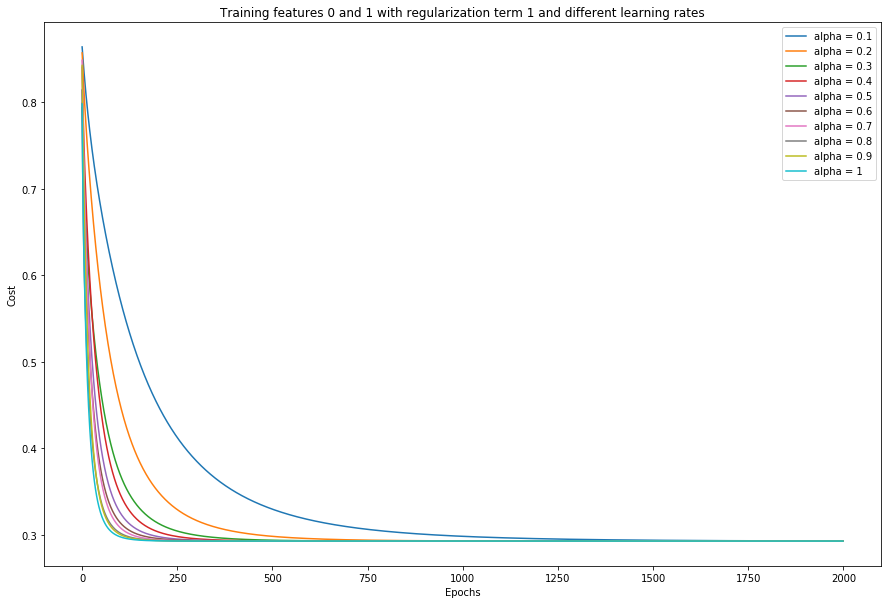

The cost in epoch 0 was 0.8531885542664388
The cost in epoch 1000 was 0.5710664479500072
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8301828656747482
The cost in epoch 1000 was 0.5710664389345348
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.799730124532181
The cost in epoch 1000 was 0.5710664389335747
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8301528054900148
The cost in epoch 1000 was 0.5710664389335747
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.918411861844563
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8776389006693467
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8134775569409504
The cost in epoch 1000 was 0.5710664389335746
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7997276075737664
The cost in ep

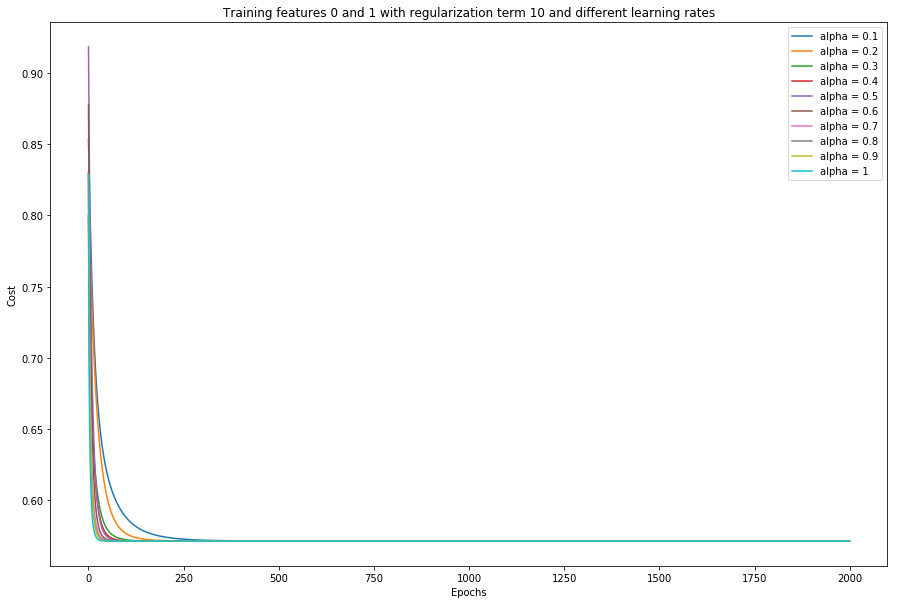

The cost in epoch 0 was 1.1625211284886223
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8328434419527462
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.2486302873985016
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8900843755538312
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8551948371459079
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9367427796498132
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8595407221360309
The cost in epoch 1000 was 0.6765425513124789
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.1944250739432902
The cost in 

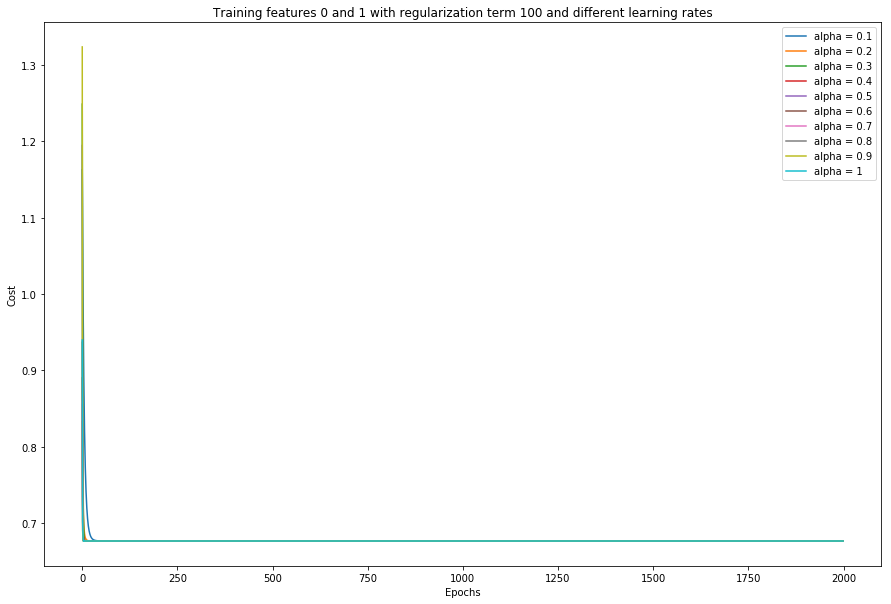

The cost in epoch 0 was 0.7993478138847863
The cost in epoch 1000 was 0.13963153196382075
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8274025658318438
The cost in epoch 1000 was 0.08407587657945025
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.806689739344082
The cost in epoch 1000 was 0.06026873642383283
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7849375925806703
The cost in epoch 1000 was 0.047866231083253205
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.79594453502546
The cost in epoch 1000 was 0.04037870681814235
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8685040473935257
The cost in epoch 1000 was 0.035536019657766926
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7808816629983427
The cost in epoch 1000 was 0.030741072961468673
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8641828775278944
The c

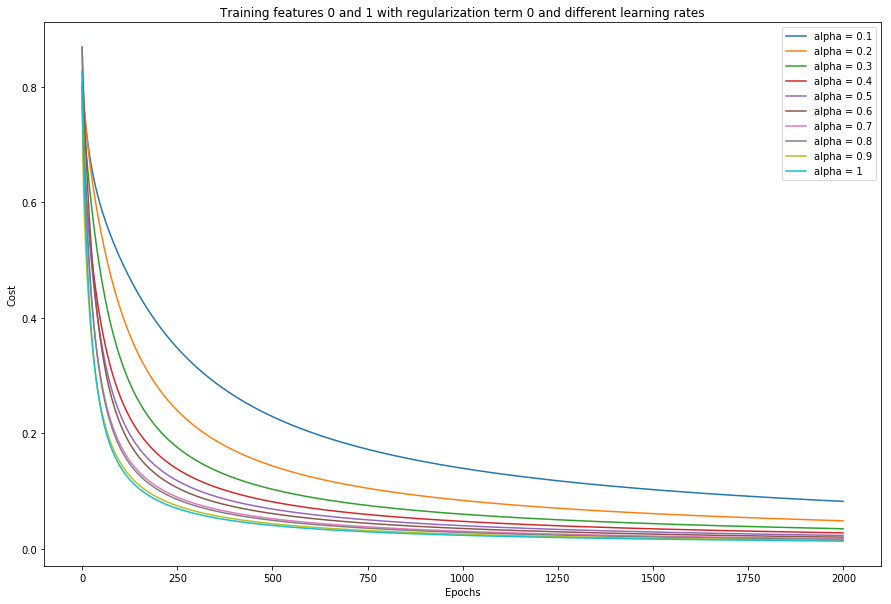

The cost in epoch 0 was 0.8211915362832674
The cost in epoch 1000 was 0.3123671655367969
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8492734961390995
The cost in epoch 1000 was 0.3082579220868776
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8958289455599404
The cost in epoch 1000 was 0.307944083740561
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.791852119169321
The cost in epoch 1000 was 0.30794327844039504
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8057435822049679
The cost in epoch 1000 was 0.30793605298411
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7906838062105714
The cost in epoch 1000 was 0.3079357492333611
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8284154730735845
The cost in epoch 1000 was 0.3079362821636278
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8821184540538337
The cost in epo

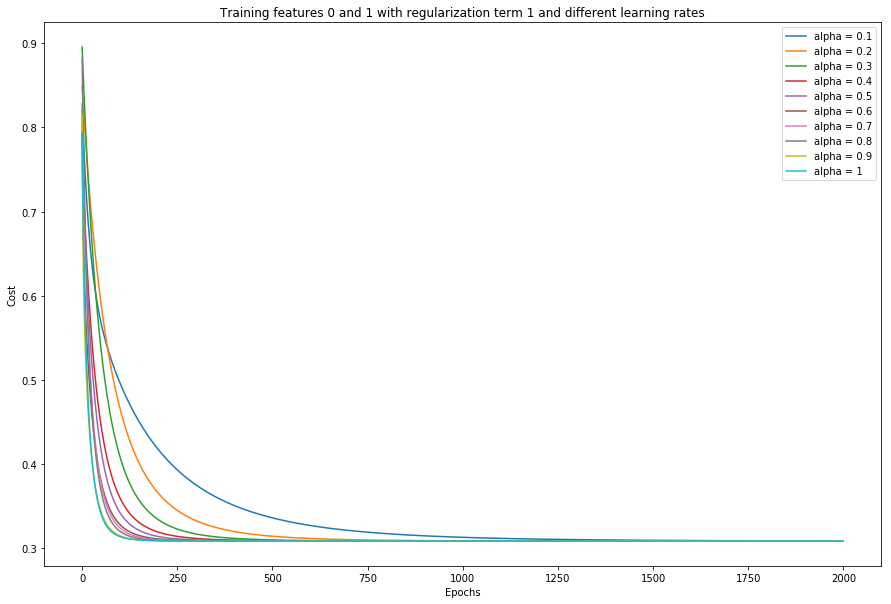

The cost in epoch 0 was 0.883900899087944
The cost in epoch 1000 was 0.5799557903081302
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.915567338854915
The cost in epoch 1000 was 0.579955701039757
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9035479180285032
The cost in epoch 1000 was 0.5799557010391356
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8113648804535971
The cost in epoch 1000 was 0.5799557010391356
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7986016414361441
The cost in epoch 1000 was 0.5799557010391356
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8851478447138054
The cost in epoch 1000 was 0.5799557010391356
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7996927678007186
The cost in epoch 1000 was 0.5799557010391356
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8438562222006223
The cost in epo

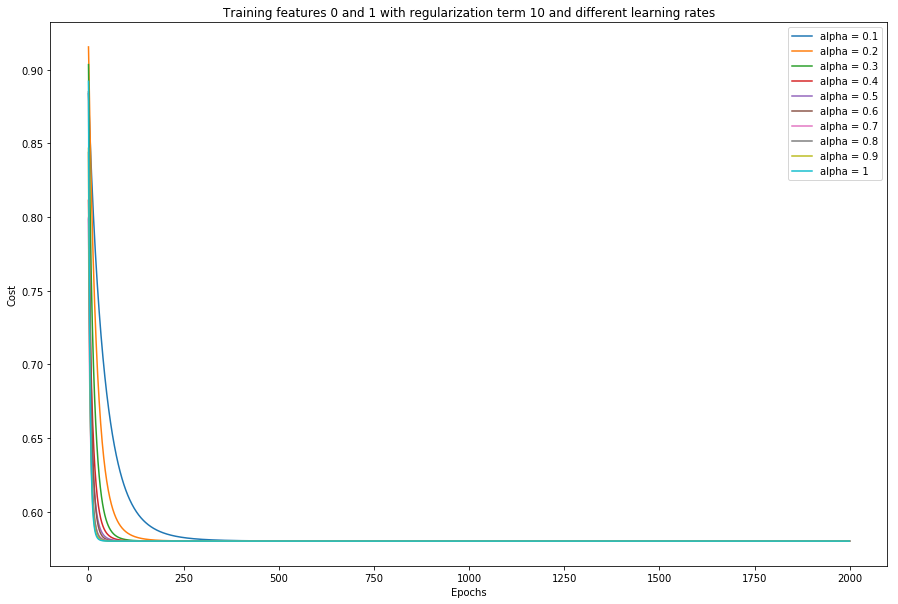

The cost in epoch 0 was 0.8671041888603771
The cost in epoch 1000 was 0.678095871911366
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0571186952545788
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9125509024987237
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0767078356178599
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.14945052646891
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9139622136704282
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8385132863494028
The cost in epoch 1000 was 0.6780958719113659
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0255075563791103
The cost in epo

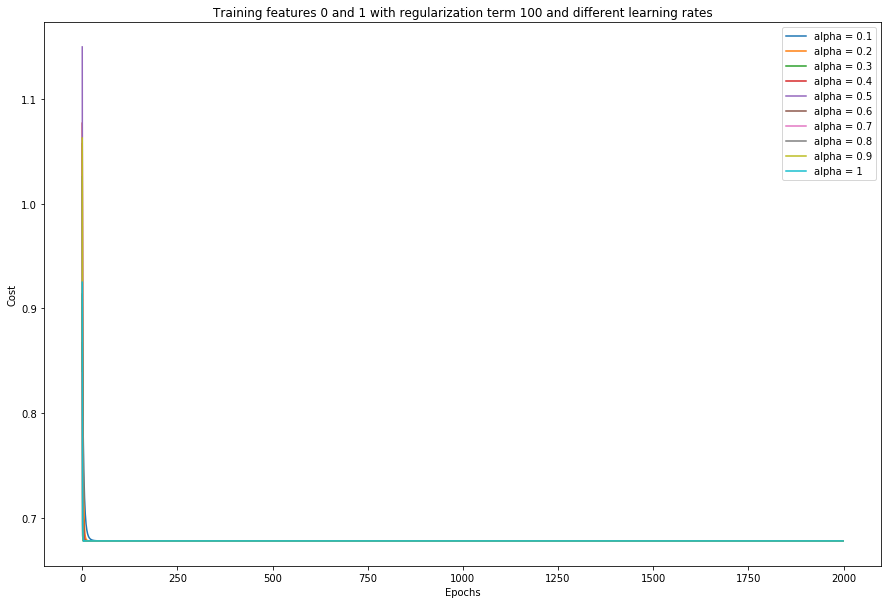

The cost in epoch 0 was 0.8776328986282954
The cost in epoch 1000 was 0.09647017026148542
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8743133004697106
The cost in epoch 1000 was 0.0509477808679403
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7345658276798558
The cost in epoch 1000 was 0.03506805371537785
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7920176974468014
The cost in epoch 1000 was 0.02722872524583569
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9757332477655513
The cost in epoch 1000 was 0.02222615582693961
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8423915708079712
The cost in epoch 1000 was 0.018632714295036452
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.6811144415220055
The cost in epoch 1000 was 0.016183958624545025
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.769715857212616
The c

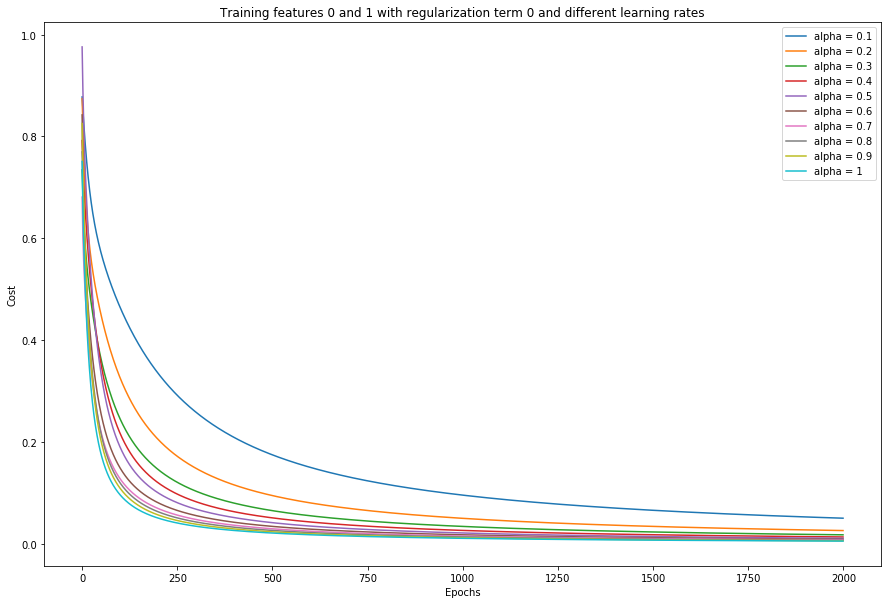

The cost in epoch 0 was 0.812804252553244
The cost in epoch 1000 was 0.28626437198791144
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.875724255803393
The cost in epoch 1000 was 0.28378224505787913
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8181775278232104
The cost in epoch 1000 was 0.28373069113091315
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7883545146147113
The cost in epoch 1000 was 0.28369785095109873
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8130641742244225
The cost in epoch 1000 was 0.2836689973219306
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7661374848782059
The cost in epoch 1000 was 0.28366609176495355
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8488003563096003
The cost in epoch 1000 was 0.28366357709319867
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8276516462817324
The cost

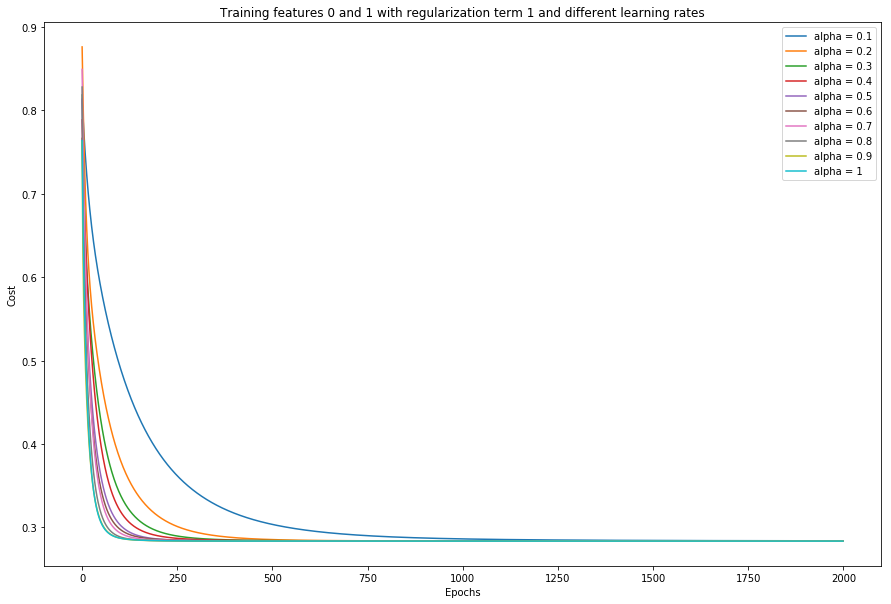

The cost in epoch 0 was 0.8023307795065662
The cost in epoch 1000 was 0.5698155503156569
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8103652423861367
The cost in epoch 1000 was 0.569815290463906
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7313725417131226
The cost in epoch 1000 was 0.5698152904577511
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7381450000077384
The cost in epoch 1000 was 0.5698152904577513
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9167982626887062
The cost in epoch 1000 was 0.5698152904577511
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.030090400381297
The cost in epoch 1000 was 0.5698152904577513
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7392960967264814
The cost in epoch 1000 was 0.5698152904577511
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8180805265532813
The cost in ep

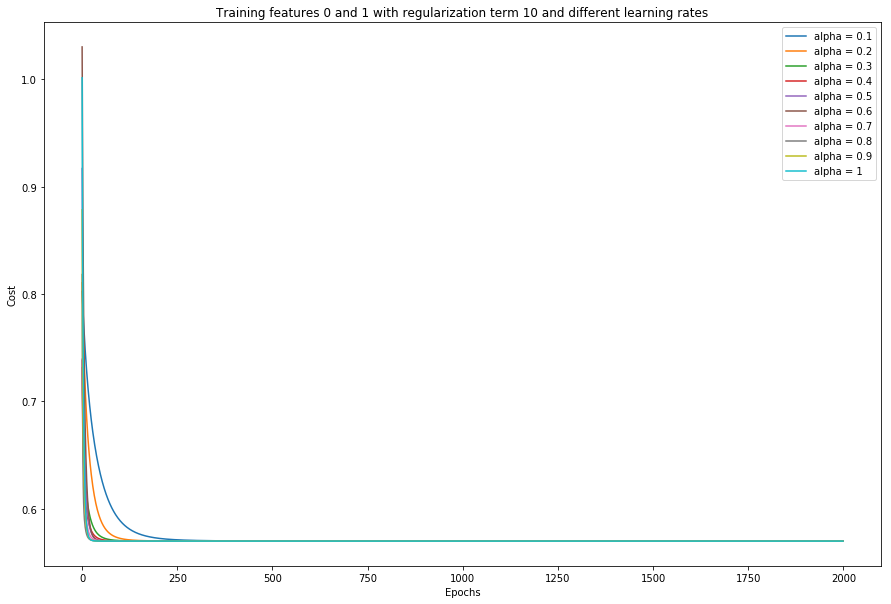

The cost in epoch 0 was 0.9780312999411183
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0064233699922558
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.015650985650138
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.1787955574714775
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.001023921600359
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7966681972663401
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0930836177178787
The cost in epoch 1000 was 0.6770591551444647
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0149846621682053
The cost in ep

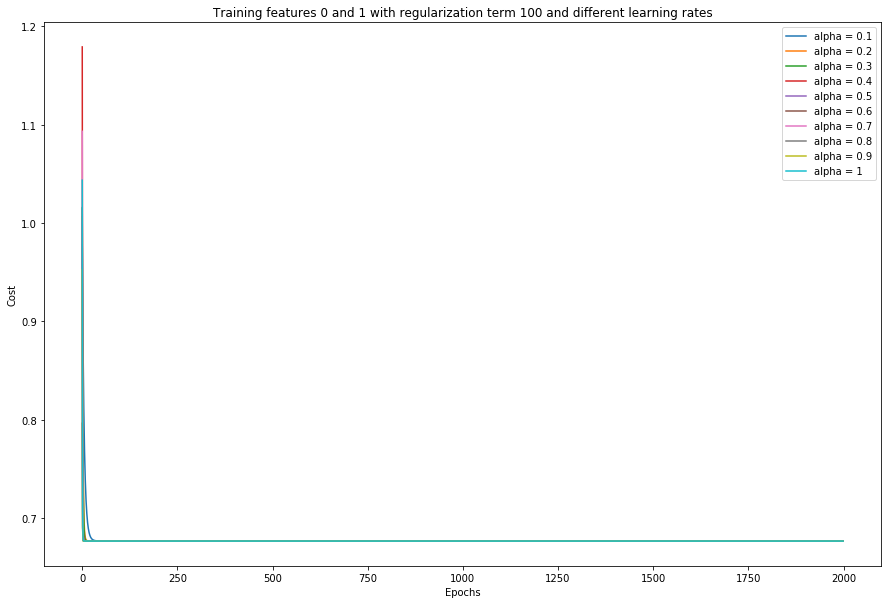

The cost in epoch 0 was 0.9054295960835863
The cost in epoch 1000 was 0.10578033485197613
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8055159514392431
The cost in epoch 1000 was 0.058383989911585034
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.805988997380344
The cost in epoch 1000 was 0.040067549597526494
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8658628635504345
The cost in epoch 1000 was 0.031113824277134165
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.6945296918781936
The cost in epoch 1000 was 0.02546524732297933
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7171113495644406
The cost in epoch 1000 was 0.021720847604233838
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7670088741181513
The cost in epoch 1000 was 0.01899087047355713
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7588680947073019
Th

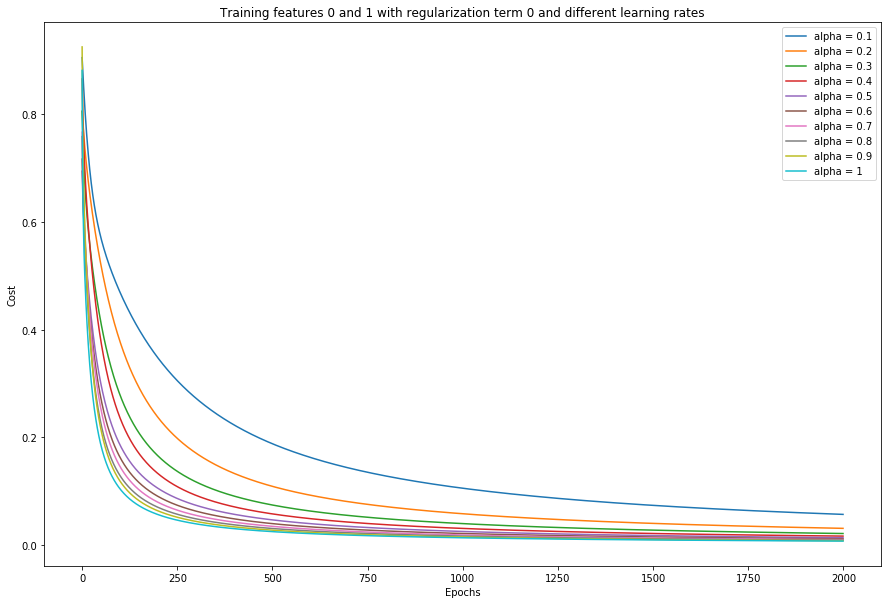

The cost in epoch 0 was 0.8148815449512017
The cost in epoch 1000 was 0.30114177233067363
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8309116795759971
The cost in epoch 1000 was 0.29884683183135574
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8407784212445126
The cost in epoch 1000 was 0.29882917462807274
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.850807467600476
The cost in epoch 1000 was 0.29874894701821486
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7668865583325675
The cost in epoch 1000 was 0.2987547625464605
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.903490752409472
The cost in epoch 1000 was 0.2987465912007175
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7973899491707815
The cost in epoch 1000 was 0.29874579295832976
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8611765092638745
The cost 

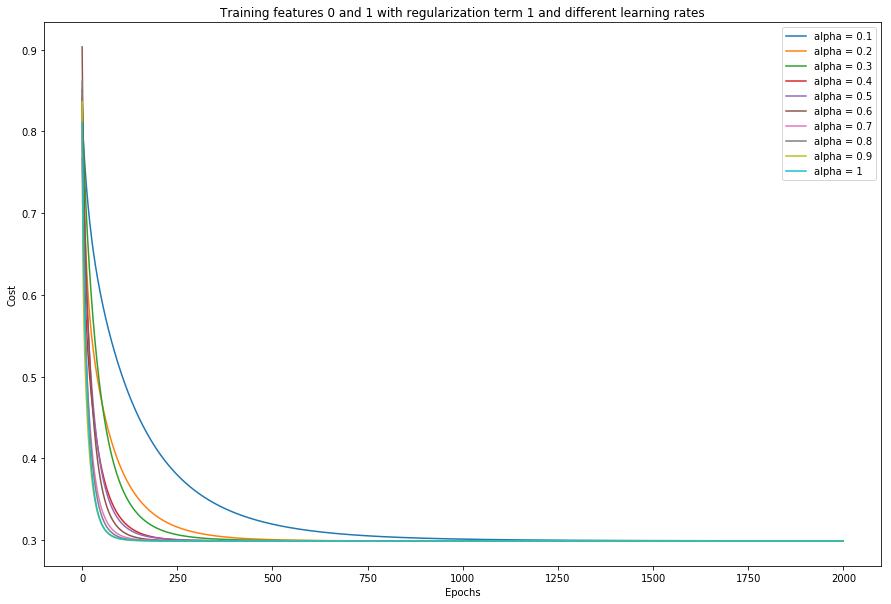

The cost in epoch 0 was 0.9256265060120914
The cost in epoch 1000 was 0.57993075166382
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7690317980726546
The cost in epoch 1000 was 0.5799307682482602
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9214043824716333
The cost in epoch 1000 was 0.5799307682439967
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8146446721026558
The cost in epoch 1000 was 0.5799307682439967
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7583940633712802
The cost in epoch 1000 was 0.5799307682439968
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.925333378283186
The cost in epoch 1000 was 0.5799307682439967
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8809891051164009
The cost in epoch 1000 was 0.5799307682439967
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7613146813142331
The cost in epo

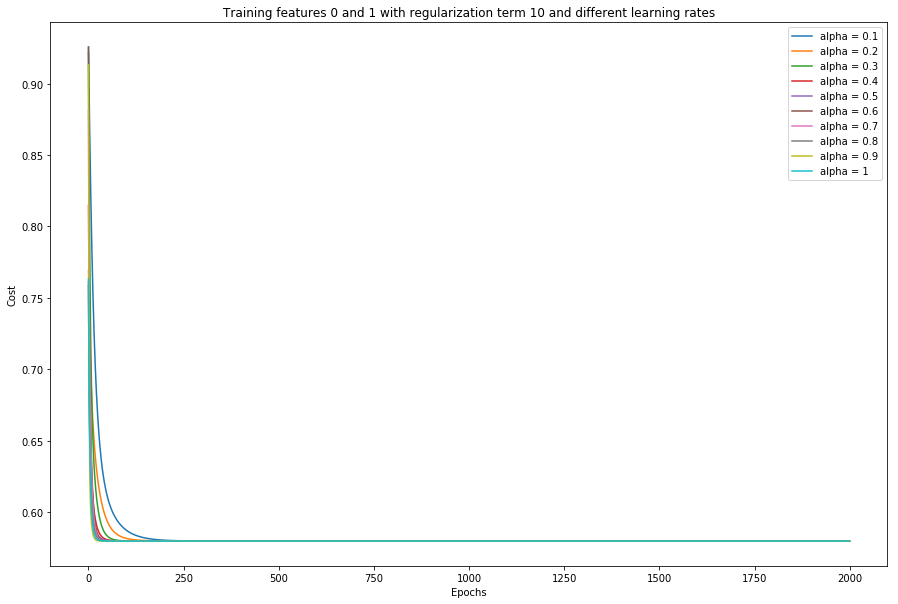

The cost in epoch 0 was 0.8359302699114394
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7998927640094953
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8599899244181032
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9529993284189908
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9243269163132015
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8669716145117253
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8228616676167868
The cost in epoch 1000 was 0.6787429657569488
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9754184656125945
The cost in 

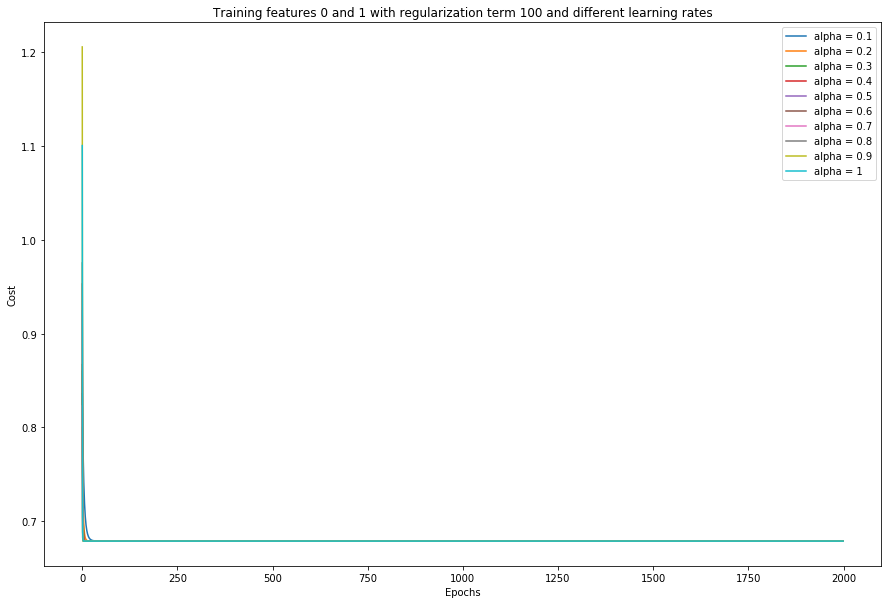

The cost in epoch 0 was 0.8076423028016732
The cost in epoch 1000 was 0.08465486414577461
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9027044311841904
The cost in epoch 1000 was 0.046116438710817664
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.885865456473681
The cost in epoch 1000 was 0.03188726887752303
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.803761307795873
The cost in epoch 1000 was 0.024481935322919424
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9200293567512995
The cost in epoch 1000 was 0.020234305035137963
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7693599624078794
The cost in epoch 1000 was 0.01704791747894057
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9250258577021807
The cost in epoch 1000 was 0.015014749257621912
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8694359331748401
The

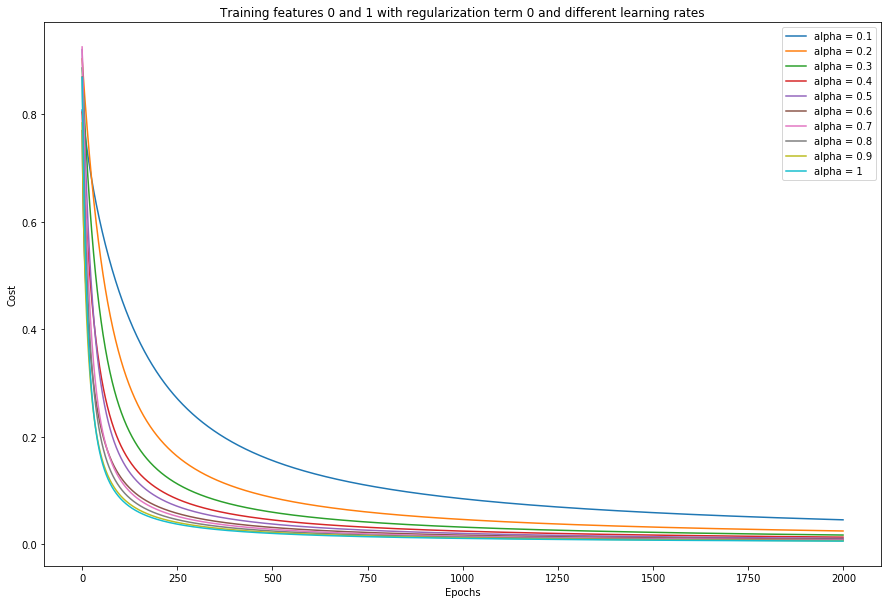

The cost in epoch 0 was 0.7950395611864018
The cost in epoch 1000 was 0.23947553700507587
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7853188480125717
The cost in epoch 1000 was 0.2357480041689395
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8849090399254985
The cost in epoch 1000 was 0.23556010153702234
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8669616236291241
The cost in epoch 1000 was 0.2355510406481506
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.786198916940452
The cost in epoch 1000 was 0.23554770307947015
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7857739614831295
The cost in epoch 1000 was 0.23554802818387183
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7887120299393457
The cost in epoch 1000 was 0.2355479444477689
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8142548846602086
The cost 

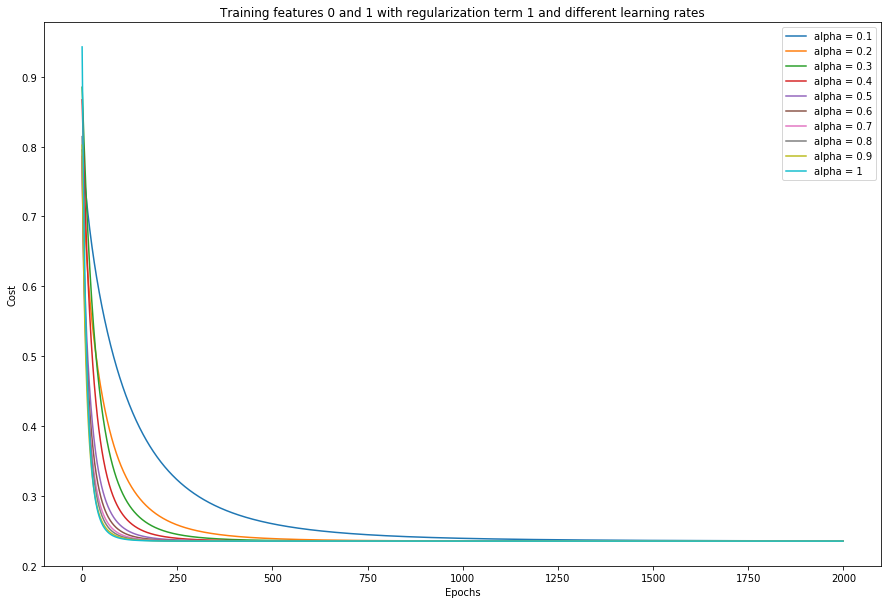

The cost in epoch 0 was 0.8110096975707046
The cost in epoch 1000 was 0.5290511346117509
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8100430970734344
The cost in epoch 1000 was 0.5290510683861022
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9244495820586962
The cost in epoch 1000 was 0.5290510683865458
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8735526231356694
The cost in epoch 1000 was 0.5290510683865458
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8851901071632763
The cost in epoch 1000 was 0.5290510683865458
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8483475568369692
The cost in epoch 1000 was 0.5290510683865458
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7968570783702069
The cost in epoch 1000 was 0.5290510683865458
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.7983280196197294
The cost in 

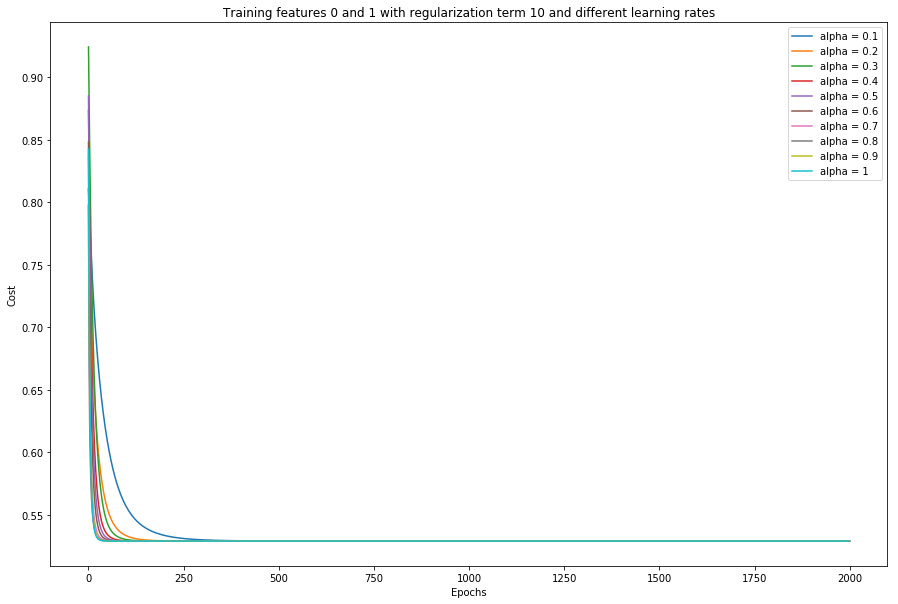

The cost in epoch 0 was 0.9047071259202022
The cost in epoch 1000 was 0.6687973664652531
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9329173089071423
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9272785237648243
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.8817258637498548
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 0.9330264110403229
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.1320821516955086
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.0028871482870596
The cost in epoch 1000 was 0.6687973664652532
Finished training, trained during 2000 epochs
The cost in epoch 0 was 1.2280257890824164
The cost in 

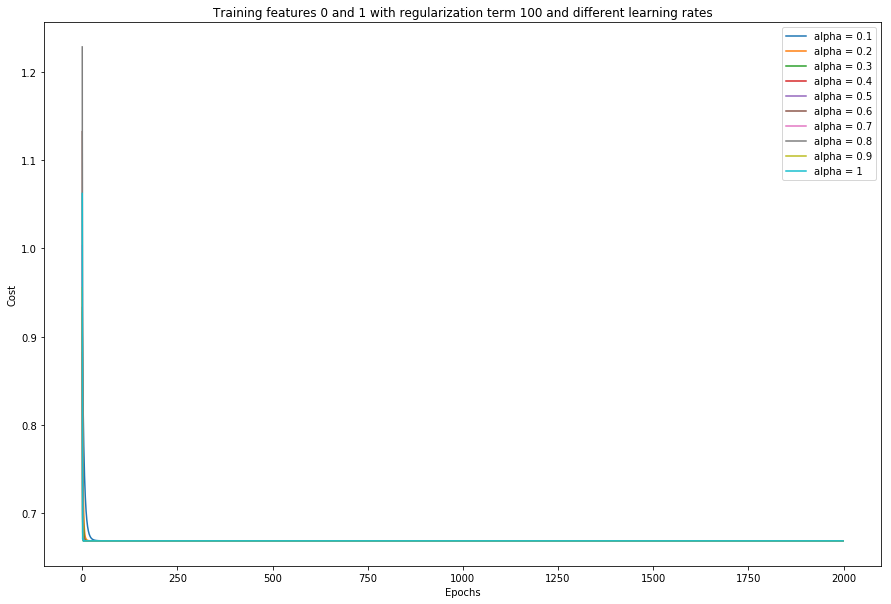

In [17]:
alphas=[0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1] #Learning rate
lambdas=[0, 1, 10, 100] #Regularization term
for f1 in range(0, 4):  #1st feature
    for f2 in range(f1 + 1, 4):  #2nd feature
        train, test = generate_data_with_features(df, elements=100, features=[f1, f2], normalise=True)
        for l in lambdas:
            for i in range(0,10):
                weights, bias, costs = train_model(train, epochs=int(2000), learning_rate=alphas[i], regularization_term=l)
                p=plt.plot(costs, label='alpha = '+str(alphas[i]))
                plt.xlabel('Epochs')
                plt.ylabel('Cost')
            plt.title('Training features 0 and 1 with regularization term '+str(l)+' and different learning rates')
            plt.legend()
            plt.show()

As we can see here, the results of different features are quite similar since the data 
set seems to tend to overfitting.

On one hand, for small regularization the model converges slowly and gets a small cost.
On the other hand, for big regularization the model converges really fast but we get 
bigger cost. The bigger the learning rate, the faster it converges. 

Now, we provide a code to choose the features and the parameters in order to get a plot
of the cost.

The cost in epoch 0 was 0.8139046934936274
The cost in epoch 1000 was 0.021797838976095642
Finished training, trained during 2000 epochs


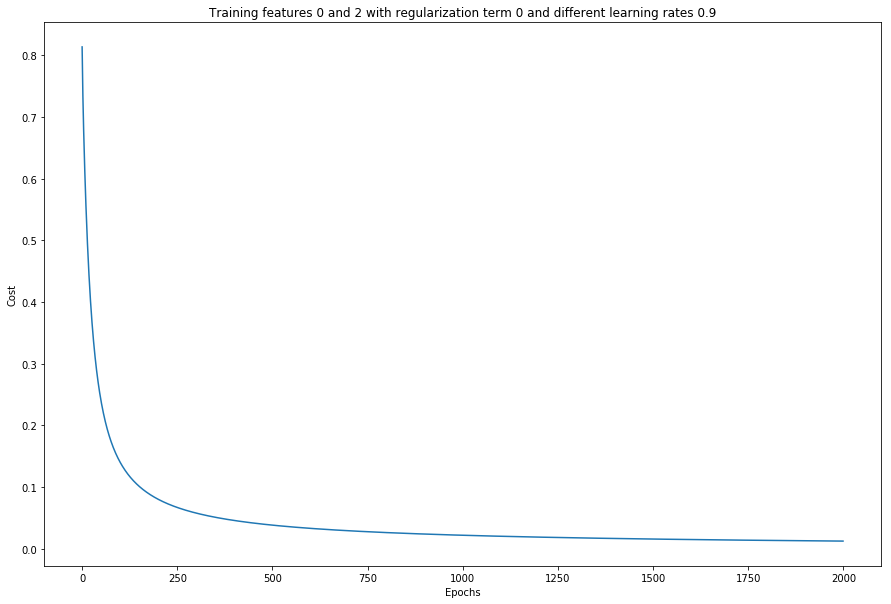

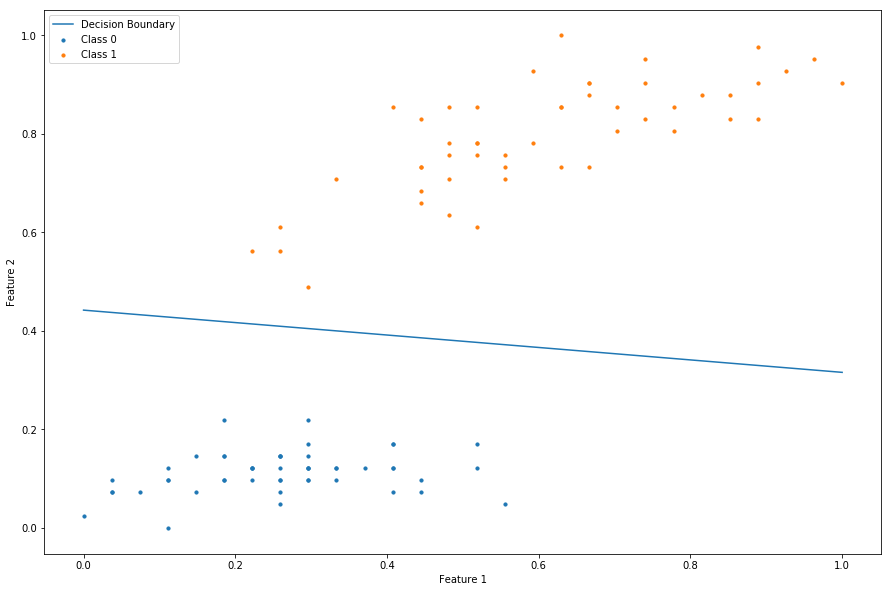

In [18]:
#Define the parameters
alphas=0.9
lambdas=0
epochs=2000

#Define features
f1=0
f2=2

train, test = generate_data_with_features(df, elements=100, features=[f1, f2], normalise=True)
weights, bias, costs = train_model(train, epochs=int(epochs), learning_rate=alphas, regularization_term=lambdas)

trainx,trainy=train


#Plot the cost
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training features '+str(f1)+' and '+str(f2)+' with regularization term '+str(lambdas)+' and different learning rates '+str(alphas))
plt.savefig('figure with features '+str(f1)+str(f2)+'and lambda'+str(lambdas))
plt.show()

#Plot the decision boundary
plot_boundary(trainx.to_numpy(), trainy.to_numpy(), weights=weights, bias=bias, str_id='iris_jp')
plt.show()

## Part 2
In this part we use 80% of the Monk2 data set for training and 20% of the data set for testing. Firstly, we load the file and define the last 20% of the data set to be the testing instances.

In [19]:
monk = pd.DataFrame(loadmat('./data/monk2.mat')['monk2'])
test_elements = math.floor(len(monk) * 0.2)
monk.head()

,0,1,2,3,4,5,6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,2,1
3,1,1,1,1,3,1,1
4,1,1,1,1,3,2,1


Now, we generate the data of training and testing. We will use features 0 and 4 because we know that we have 2 classes.

In [20]:
train, test = generate_data_with_features(monk, elements=346, features=[0, 4], normalise=True, test_elements=test_elements)

We try different values of learning rates (alphas) and different values of the regularization (lambdas). We cannot use huge values for the regularization term because we bump into convergence problems of the model.

The cost in epoch 0 was 1.2779456313657376
The cost in epoch 1000 was 0.5984830622043881
The cost in epoch 2000 was 0.597895867307922
The cost in epoch 3000 was 0.5978360025094613
The cost in epoch 4000 was 0.5978297204312603
The cost in epoch 5000 was 0.5978290549482046
The cost in epoch 6000 was 0.5978289842335663
The cost in epoch 7000 was 0.5978289767118251
The cost in epoch 8000 was 0.5978289759114935
The cost in epoch 9000 was 0.5978289758263272
Finished training, trained during 10000 epochs
The cost in epoch 0 was 0.7203156130824371
The cost in epoch 1000 was 0.5978989534696093
The cost in epoch 2000 was 0.5978297525149834
The cost in epoch 3000 was 0.597828984573862
The cost in epoch 4000 was 0.5978289759150974
The cost in epoch 5000 was 0.597828975817302
The cost in epoch 6000 was 0.5978289758161973
The cost in epoch 7000 was 0.5978289758161849
The cost in epoch 8000 was 0.5978289758161848
The cost in epoch 9000 was 0.5978289758161847
Finished training, trained during 10000 ep

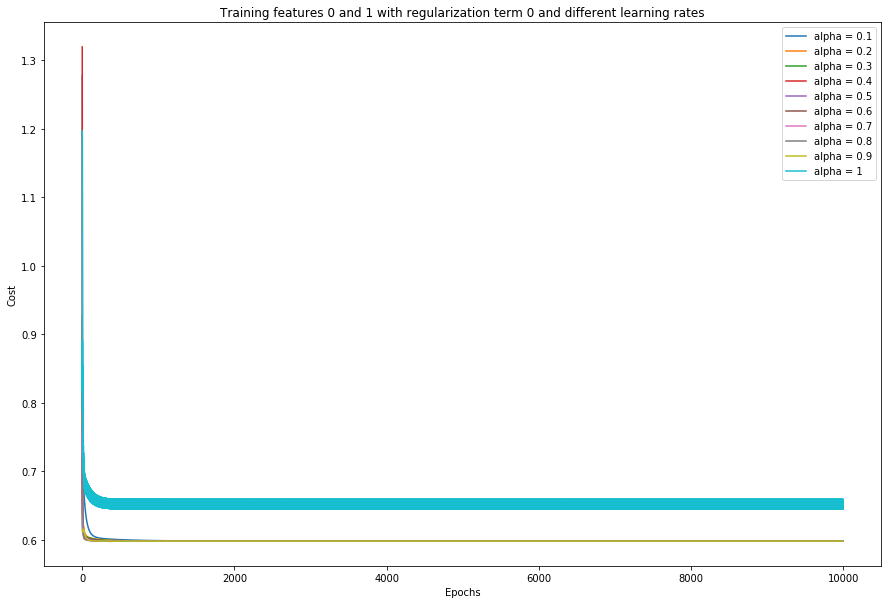

The cost in epoch 0 was 0.89390585750716
The cost in epoch 1000 was 0.6012562640364935
The cost in epoch 2000 was 0.600686814969694
The cost in epoch 3000 was 0.6005817894786513
The cost in epoch 4000 was 0.6005607420418723
The cost in epoch 5000 was 0.6005564468408979
The cost in epoch 6000 was 0.6005555669968142
The cost in epoch 7000 was 0.6005553866266291
The cost in epoch 8000 was 0.6005553496444173
The cost in epoch 9000 was 0.6005553420615198
Finished training, trained during 10000 epochs
The cost in epoch 0 was 0.6813967004416895
The cost in epoch 1000 was 0.6006543765320737
The cost in epoch 2000 was 0.6005594215155813
The cost in epoch 3000 was 0.600555511142487
The cost in epoch 4000 was 0.6005553472782524
The cost in epoch 5000 was 0.6005553404064614
The cost in epoch 6000 was 0.6005553401182778
The cost in epoch 7000 was 0.6005553401061924
The cost in epoch 8000 was 0.6005553401056853
The cost in epoch 9000 was 0.6005553401056642
Finished training, trained during 10000 epo

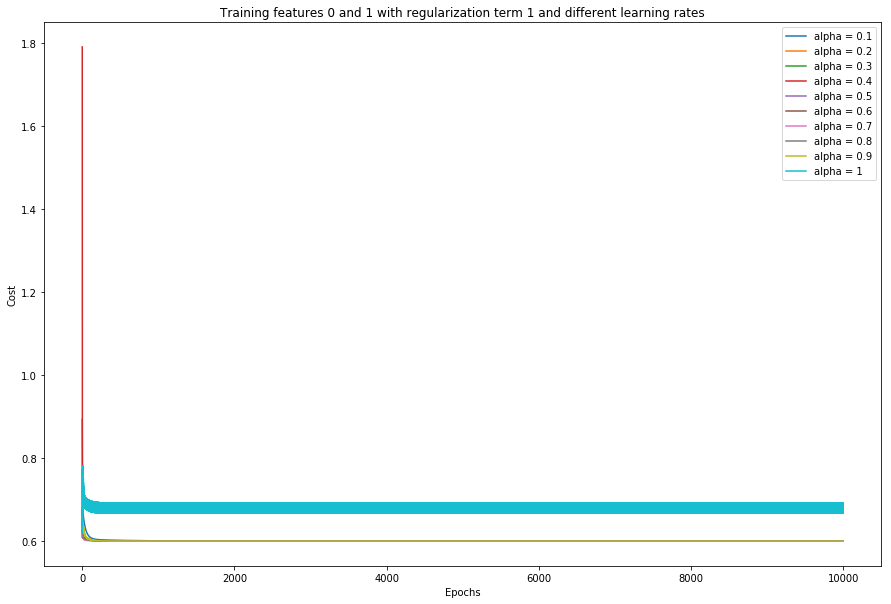

The cost in epoch 0 was 0.6385565897321165
The cost in epoch 1000 was 0.6241491806762028
The cost in epoch 2000 was 0.6241877562521572
The cost in epoch 3000 was 0.6241879680510124
The cost in epoch 4000 was 0.6241879692130472
The cost in epoch 5000 was 0.6241879692194228
The cost in epoch 6000 was 0.6241879692194577
The cost in epoch 7000 was 0.6241879692194577
The cost in epoch 8000 was 0.6241879692194577
The cost in epoch 9000 was 0.6241879692194577
Finished training, trained during 10000 epochs
The cost in epoch 0 was 0.9369486758834829
The cost in epoch 1000 was 0.6241877042275419
The cost in epoch 2000 was 0.6241879692116955
The cost in epoch 3000 was 0.6241879692194577
The cost in epoch 4000 was 0.6241879692194578
The cost in epoch 5000 was 0.6241879692194578
The cost in epoch 6000 was 0.6241879692194578
The cost in epoch 7000 was 0.6241879692194578
The cost in epoch 8000 was 0.6241879692194578
The cost in epoch 9000 was 0.6241879692194578
Finished training, trained during 10000

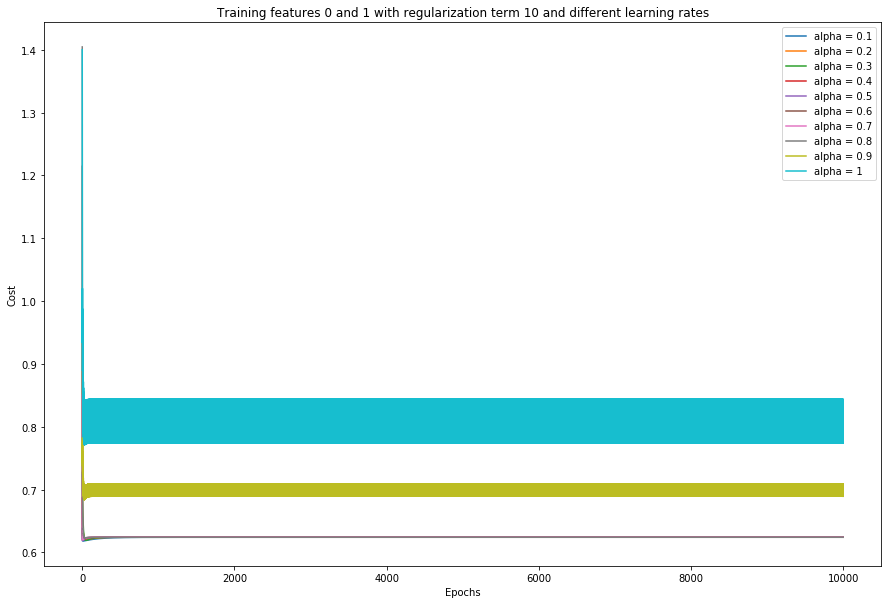

In [21]:
alphas=[0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1] #Learning rate
lambdas=[0, 1, 10] #Regularization term

for l in lambdas:
    for i in range(0,10):

        weights, bias, costs = train_model(train, epochs=int(10000), learning_rate=alphas[i], regularization_term=l)
        p=plt.plot(costs, label='alpha = '+str(alphas[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
    plt.title('Training features 0 and 1 with regularization term '+str(l)+' and different learning rates')
    plt.legend()
    plt.show()

It is interesting to note that in some features, for high values of the learning rate, the regularization parameters the cost seems to be unstable. Thus, we stick with smaller values of the regularization and high values of the learning rate to guarantee fast convergence. Hence, in the following we give the accuracy of a model (with 0.5 learning rate and 0.05 regularization), the cost function and the decision boundary.

The cost in epoch 0 was 0.7552024689187682
The cost in epoch 1000 was 0.5979026845905258
The cost in epoch 2000 was 0.5979015889168594
The cost in epoch 3000 was 0.5979015855317253
The cost in epoch 4000 was 0.5979015855208218
The cost in epoch 5000 was 0.5979015855207869
The cost in epoch 6000 was 0.5979015855207866
The cost in epoch 7000 was 0.5979015855207866
The cost in epoch 8000 was 0.5979015855207866
The cost in epoch 9000 was 0.5979015855207866
The cost in epoch 10000 was 0.5979015855207866
The cost in epoch 11000 was 0.5979015855207866
The cost in epoch 12000 was 0.5979015855207866
The cost in epoch 13000 was 0.5979015855207866
The cost in epoch 14000 was 0.5979015855207866
The cost in epoch 15000 was 0.5979015855207866
The cost in epoch 16000 was 0.5979015855207866
The cost in epoch 17000 was 0.5979015855207866
The cost in epoch 18000 was 0.5979015855207866
The cost in epoch 19000 was 0.5979015855207866
The cost in epoch 20000 was 0.5979015855207866
The cost in epoch 21000 wa

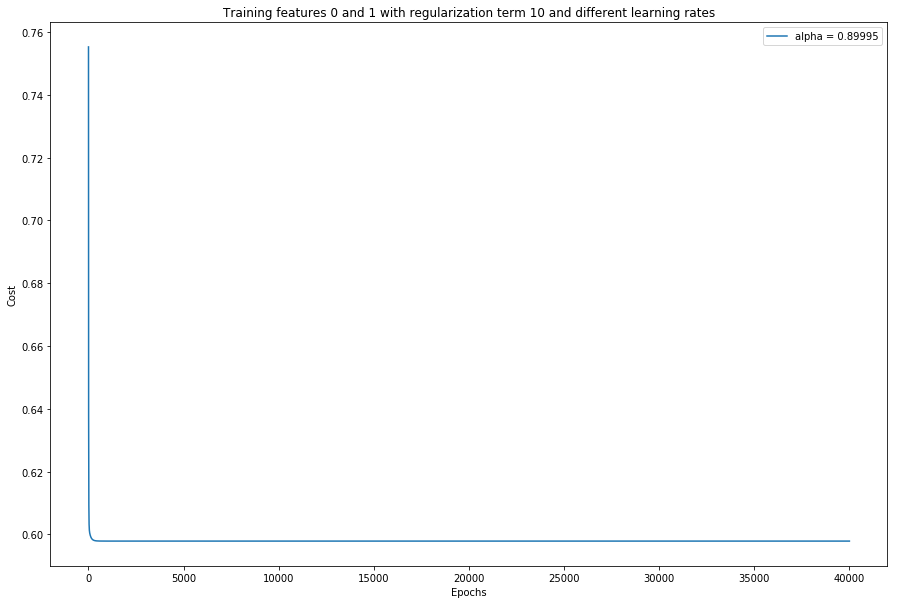

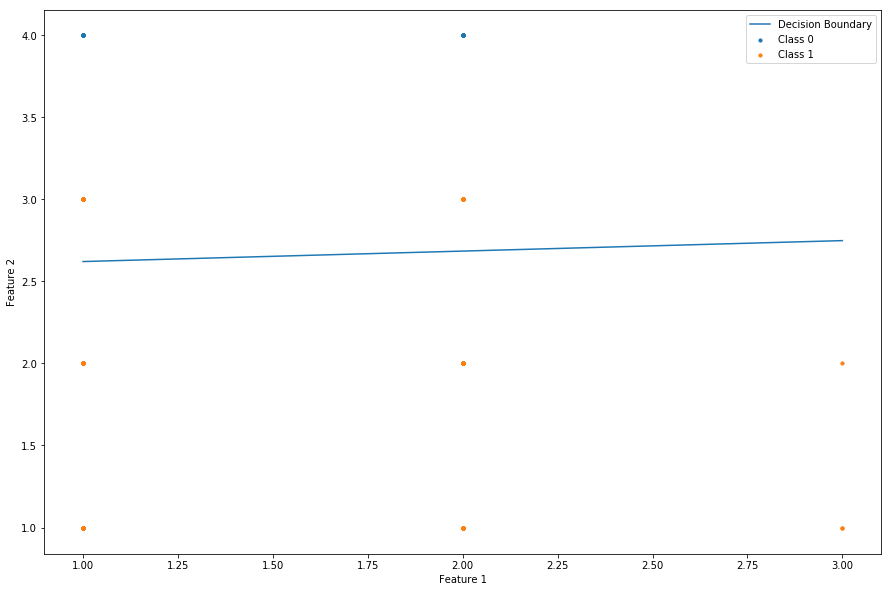

In [22]:
weights, bias, costs = train_model(train, epochs=40000, learning_rate=0.5, regularization_term=0.05)

print('Train error of the model is '+str(test_model(train, weights, bias)))
print('Test error of the model is '+str(test_model(test, weights, bias)))

#Cost of the model
plt.plot(costs, label='alpha = 0.89995')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training features 0 and 1 with regularization term '+str(l)+' and different learning rates')
plt.legend()
plt.show()

#Decision Boundary
plot_boundary(train[0].to_numpy(), train[1].to_numpy(),  weights=weights, bias=bias, str_id='monk_jp')
plt.show()

It is hard to lower even more the errors of the model. Now, we will give the same results but for different features.

The cost in epoch 0 was 0.5932051711717088
The cost in epoch 1000 was 0.5454746731923361
The cost in epoch 2000 was 0.5427687128245172
The cost in epoch 3000 was 0.5423588951094817
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.5916116080779523
The cost in epoch 1000 was 0.5427684211957478
The cost in epoch 2000 was 0.542292191738729
The cost in epoch 3000 was 0.5422791656765495
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6145811474685927
The cost in epoch 1000 was 0.5423496334749185
The cost in epoch 2000 was 0.5422791212153559
The cost in epoch 3000 was 0.5422787807622801
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6281601931084758
The cost in epoch 1000 was 0.5422918573181459
The cost in epoch 2000 was 0.5422787899610595
The cost in epoch 3000 was 0.5422787790781585
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6909775419202538
The cost in epoch 1000 was 0.54228112807193
The co

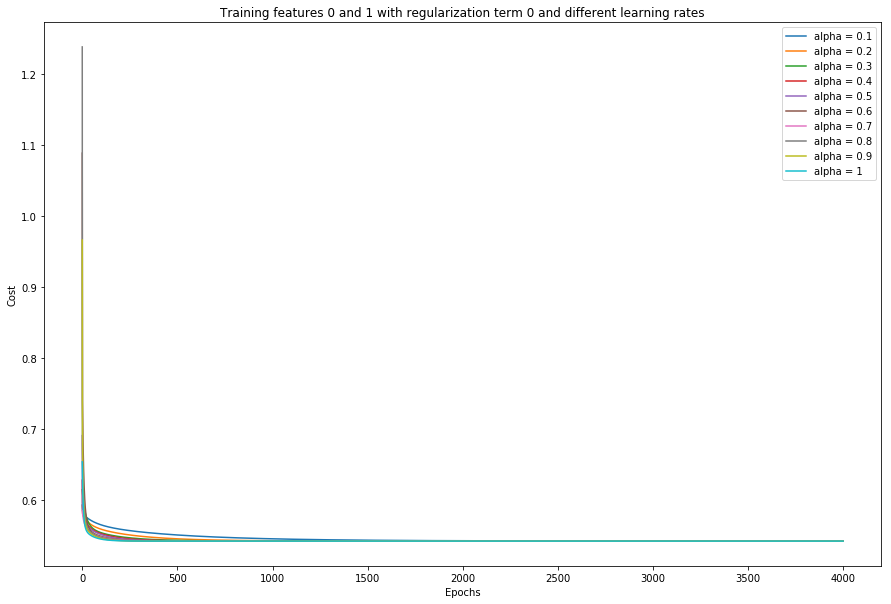

The cost in epoch 0 was 0.6969039506349847
The cost in epoch 1000 was 0.5520809820180135
The cost in epoch 2000 was 0.5502739864241945
The cost in epoch 3000 was 0.5498952014302841
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6450398331321848
The cost in epoch 1000 was 0.5504073013733064
The cost in epoch 2000 was 0.5498136346324961
The cost in epoch 3000 was 0.5497802575180871
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6237230956453808
The cost in epoch 1000 was 0.5499327099663703
The cost in epoch 2000 was 0.5497803541790839
The cost in epoch 3000 was 0.5497781948598742
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0376712874289002
The cost in epoch 1000 was 0.5498139828774
The cost in epoch 2000 was 0.5497782875839158
The cost in epoch 3000 was 0.5497781638272616
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.1385565194726819
The cost in epoch 1000 was 0.5497876357468116
The co

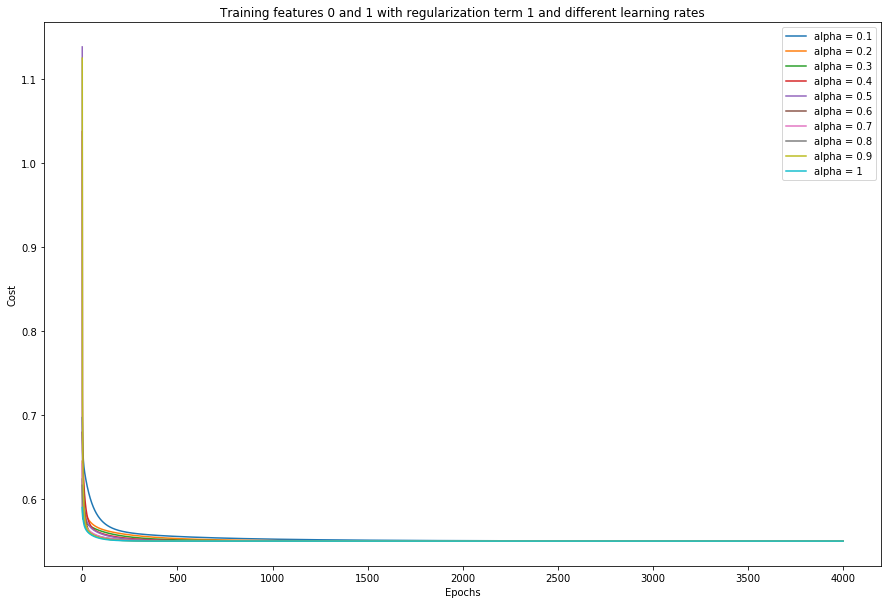

The cost in epoch 0 was 0.6818945602629265
The cost in epoch 1000 was 0.5981846275797313
The cost in epoch 2000 was 0.598263573699416
The cost in epoch 3000 was 0.5982640487489325
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.1283250050980205
The cost in epoch 1000 was 0.5982639135838611
The cost in epoch 2000 was 0.598264051616588
The cost in epoch 3000 was 0.5982640516214452
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6472765035510797
The cost in epoch 1000 was 0.5982640501677269
The cost in epoch 2000 was 0.598264051621445
The cost in epoch 3000 was 0.5982640516214452
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6157611149407963
The cost in epoch 1000 was 0.5982640516147208
The cost in epoch 2000 was 0.5982640516214454
The cost in epoch 3000 was 0.5982640516214454
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7036772589658563
The cost in epoch 1000 was 0.5982640516214001
The co

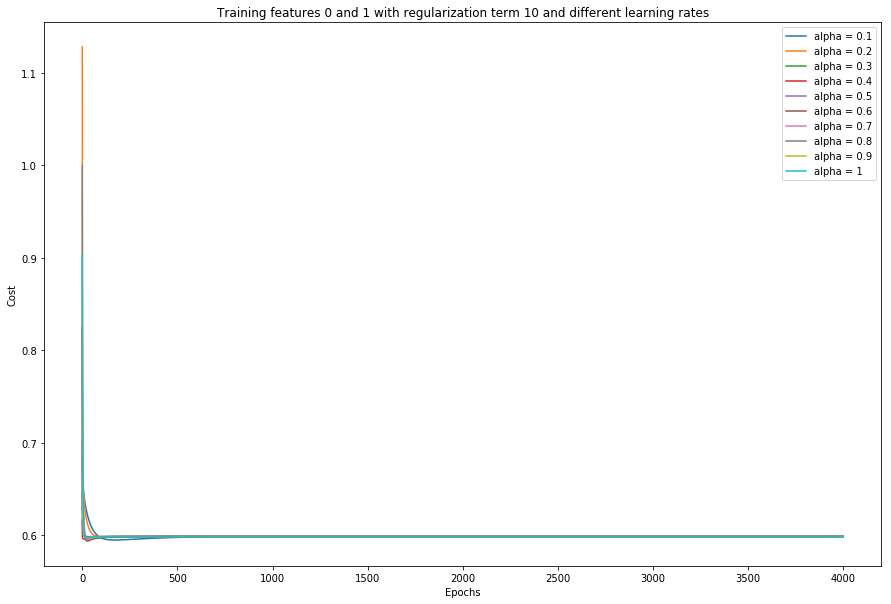

The cost in epoch 0 was 0.8193465261903926
The cost in epoch 1000 was 0.6673321995439695
The cost in epoch 2000 was 0.6673321995439695
The cost in epoch 3000 was 0.6673321995439695
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6665017556649441
The cost in epoch 1000 was 0.6673321995439695
The cost in epoch 2000 was 0.6673321995439695
The cost in epoch 3000 was 0.6673321995439695
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7367510265576177
The cost in epoch 1000 was 0.6673321995439695
The cost in epoch 2000 was 0.6673321995439695
The cost in epoch 3000 was 0.6673321995439695
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7225339092601603
The cost in epoch 1000 was 0.6673321995439695
The cost in epoch 2000 was 0.6673321995439695
The cost in epoch 3000 was 0.6673321995439695
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6810400795489038
The cost in epoch 1000 was 0.6673321995439695
The

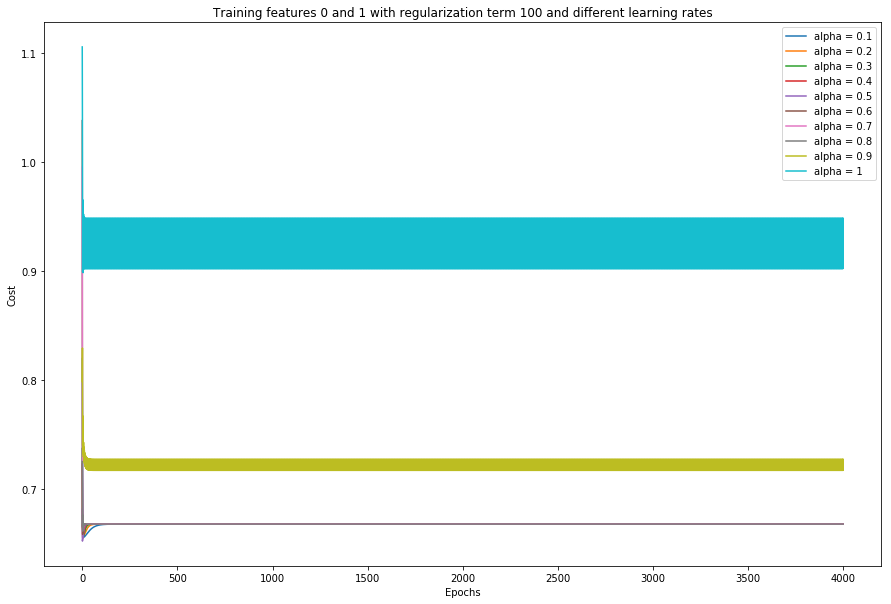

The cost in epoch 0 was 0.7735429146735489
The cost in epoch 1000 was 0.6907829902593496
The cost in epoch 2000 was 0.6904464701917806
The cost in epoch 3000 was 0.690409950776937
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.799468041209624
The cost in epoch 1000 was 0.690443248490002
The cost in epoch 2000 was 0.6904059572108908
The cost in epoch 3000 was 0.690405521276059
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6956048143433617
The cost in epoch 1000 was 0.690411758907066
The cost in epoch 2000 was 0.690405523977246
The cost in epoch 3000 was 0.6904055161339689
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.991628499026842
The cost in epoch 1000 was 0.6904058026870531
The cost in epoch 2000 was 0.6904055161627985
The cost in epoch 3000 was 0.6904055161240987
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8398711709883349
The cost in epoch 1000 was 0.6904055582709689
The cost i

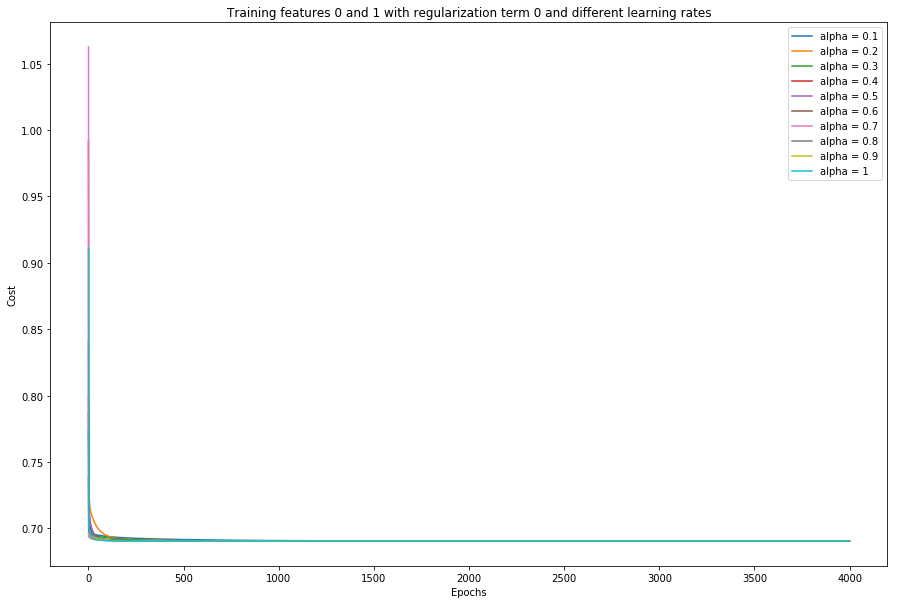

The cost in epoch 0 was 0.7085719397813572
The cost in epoch 1000 was 0.6906809466629636
The cost in epoch 2000 was 0.6904543531251723
The cost in epoch 3000 was 0.6904555170522694
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8184321779086269
The cost in epoch 1000 was 0.6904526617713457
The cost in epoch 2000 was 0.690458620788499
The cost in epoch 3000 was 0.6904593412450073
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8449647335039695
The cost in epoch 1000 was 0.6904564203577737
The cost in epoch 2000 was 0.6904593427373363
The cost in epoch 3000 was 0.6904593798101389
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8499130234726521
The cost in epoch 1000 was 0.6904586533559006
The cost in epoch 2000 was 0.6904593783810202
The cost in epoch 3000 was 0.6904593802231102
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7172909182476556
The cost in epoch 1000 was 0.6904591825475354
The 

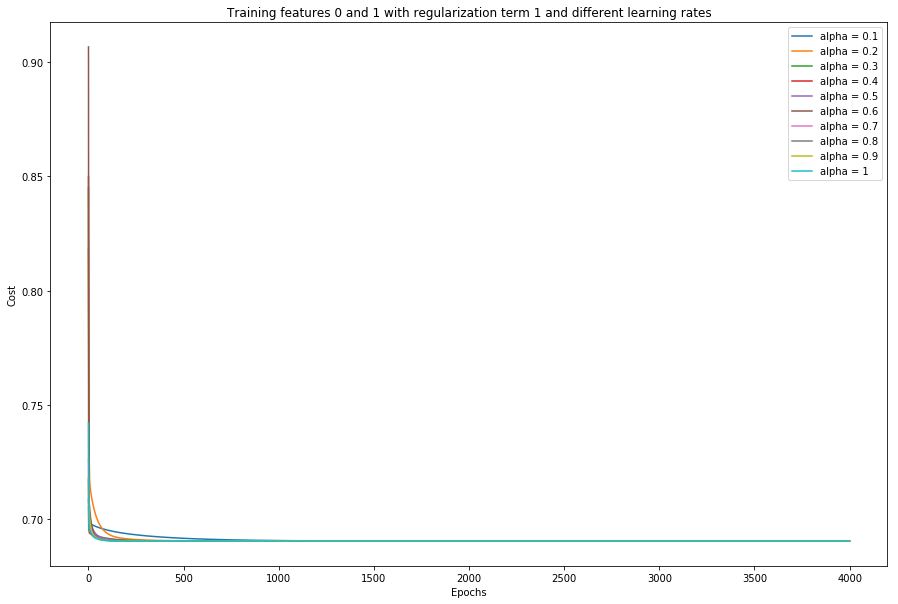

The cost in epoch 0 was 0.784364260496081
The cost in epoch 1000 was 0.6907887091350907
The cost in epoch 2000 was 0.6907984520712851
The cost in epoch 3000 was 0.6907985219212068
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8042113976419385
The cost in epoch 1000 was 0.6907984287463083
The cost in epoch 2000 was 0.6907985224048507
The cost in epoch 3000 was 0.6907985224092487
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7267502365139145
The cost in epoch 1000 was 0.6907985219214017
The cost in epoch 2000 was 0.6907985224092487
The cost in epoch 3000 was 0.6907985224092489
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6998118574158388
The cost in epoch 1000 was 0.6907985224058484
The cost in epoch 2000 was 0.6907985224092489
The cost in epoch 3000 was 0.6907985224092489
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7538187832404888
The cost in epoch 1000 was 0.6907985224092296
The 

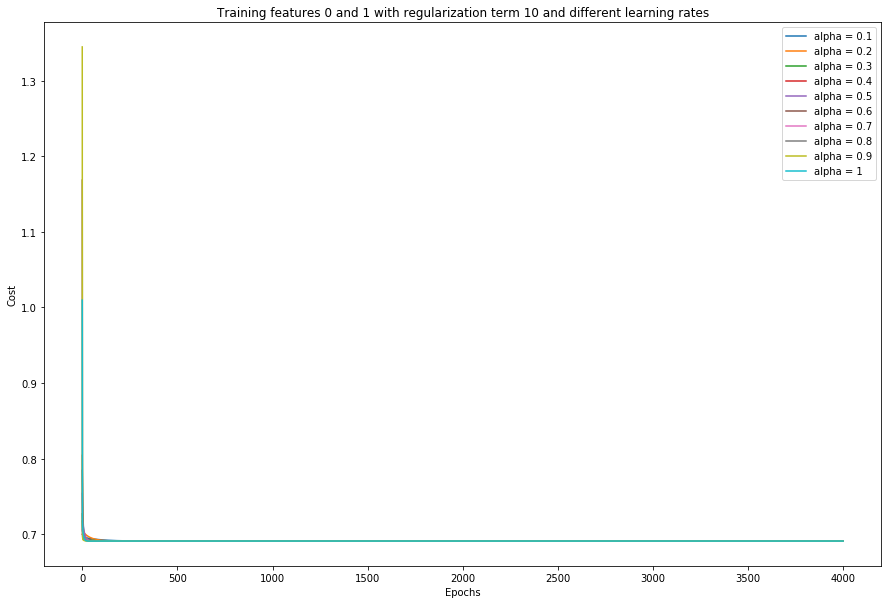

The cost in epoch 0 was 0.758781643479875
The cost in epoch 1000 was 0.6915224397527444
The cost in epoch 2000 was 0.6915224397527444
The cost in epoch 3000 was 0.6915224397527444
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8288756377997782
The cost in epoch 1000 was 0.6915224397527444
The cost in epoch 2000 was 0.6915224397527444
The cost in epoch 3000 was 0.6915224397527444
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.795567680861782
The cost in epoch 1000 was 0.6915224397527444
The cost in epoch 2000 was 0.6915224397527444
The cost in epoch 3000 was 0.6915224397527444
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7209999042569055
The cost in epoch 1000 was 0.6915224397527444
The cost in epoch 2000 was 0.6915224397527444
The cost in epoch 3000 was 0.6915224397527444
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7965590103649483
The cost in epoch 1000 was 0.6915224397527443
The c

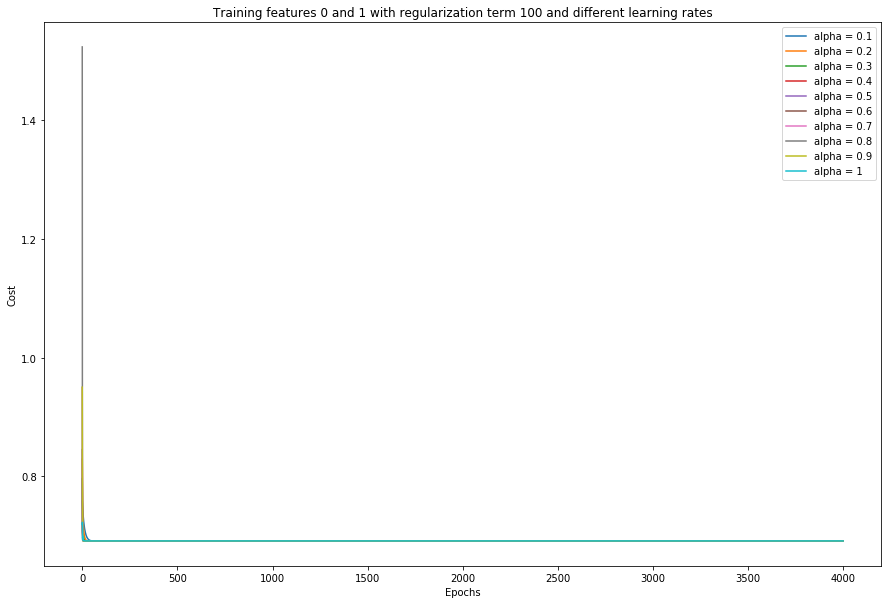

The cost in epoch 0 was 0.88772490523356
The cost in epoch 1000 was 0.6864834935632965
The cost in epoch 2000 was 0.6864157505502445
The cost in epoch 3000 was 0.6864105617667358
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7069275233728788
The cost in epoch 1000 was 0.6864271694964819
The cost in epoch 2000 was 0.686410231737123
The cost in epoch 3000 was 0.6864101332127815
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7198236380027714
The cost in epoch 1000 was 0.6864108059908317
The cost in epoch 2000 was 0.6864101329338876
The cost in epoch 3000 was 0.6864101326375751
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0389837436568587
The cost in epoch 1000 was 0.6864101616040289
The cost in epoch 2000 was 0.6864101326384079
The cost in epoch 3000 was 0.6864101326374447
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9082071782015827
The cost in epoch 1000 was 0.6864101357047935
The co

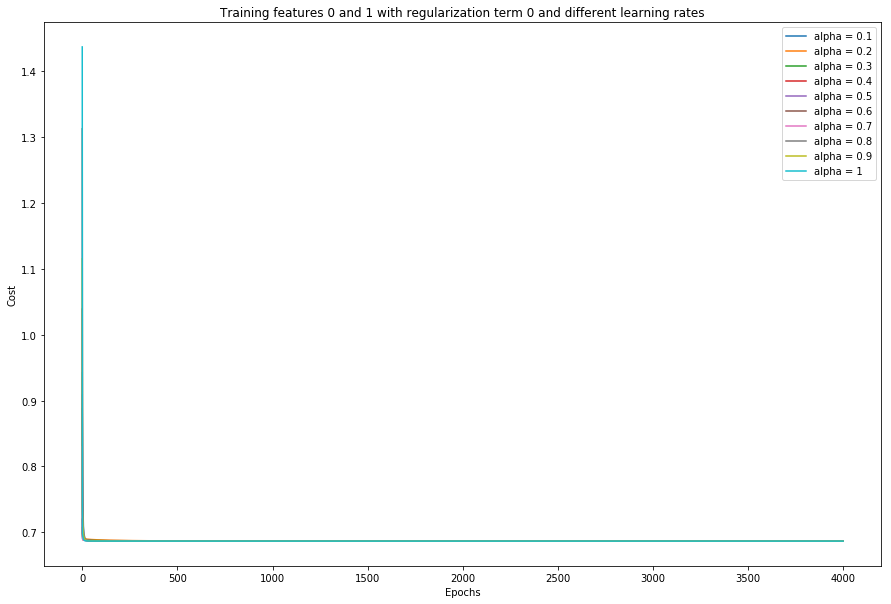

The cost in epoch 0 was 0.7206784687652861
The cost in epoch 1000 was 0.6865496778709541
The cost in epoch 2000 was 0.6865535782510984
The cost in epoch 3000 was 0.6865790873606902
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6920824755306748
The cost in epoch 1000 was 0.6865604761085881
The cost in epoch 2000 was 0.686585064825767
The cost in epoch 3000 was 0.6865860373905226
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.2478364745328212
The cost in epoch 1000 was 0.6865831964134258
The cost in epoch 2000 was 0.6865860538172619
The cost in epoch 3000 was 0.6865860726120165
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9229645093302502
The cost in epoch 1000 was 0.6865853850927827
The cost in epoch 2000 was 0.6865860719031542
The cost in epoch 3000 was 0.6865860727339974
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8883250171177534
The cost in epoch 1000 was 0.6865859275064636
The 

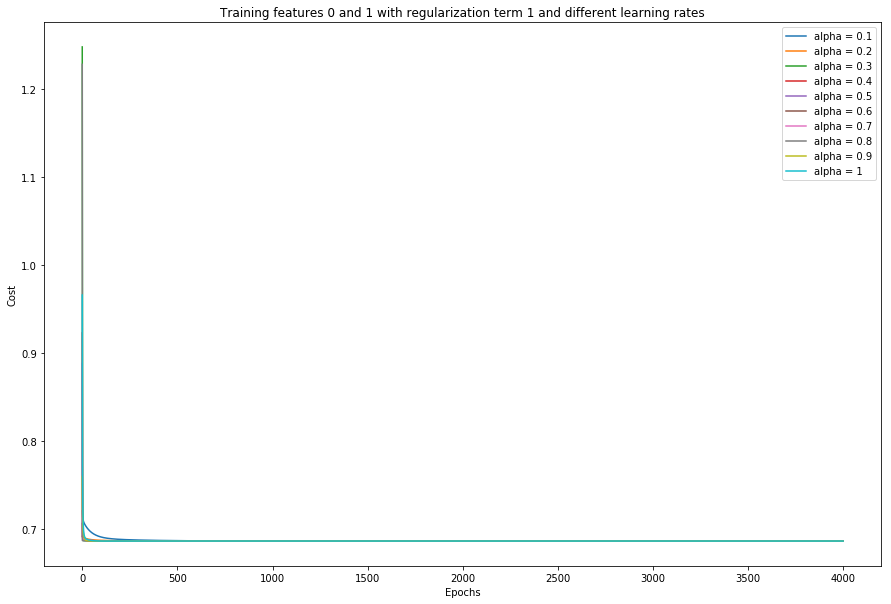

The cost in epoch 0 was 1.0431717502969342
The cost in epoch 1000 was 0.6880770686865769
The cost in epoch 2000 was 0.688097005809496
The cost in epoch 3000 was 0.6880971214168228
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7281678963458248
The cost in epoch 1000 was 0.6880969533783569
The cost in epoch 2000 was 0.6880971220809433
The cost in epoch 3000 was 0.6880971220863896
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.761990480315739
The cost in epoch 1000 was 0.6880971214450005
The cost in epoch 2000 was 0.6880971220863897
The cost in epoch 3000 was 0.68809712208639
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.6628139623111853
The cost in epoch 1000 was 0.6880971220841826
The cost in epoch 2000 was 0.6880971220863898
The cost in epoch 3000 was 0.6880971220863898
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.022993142572869
The cost in epoch 1000 was 0.6880971220863753
The cost

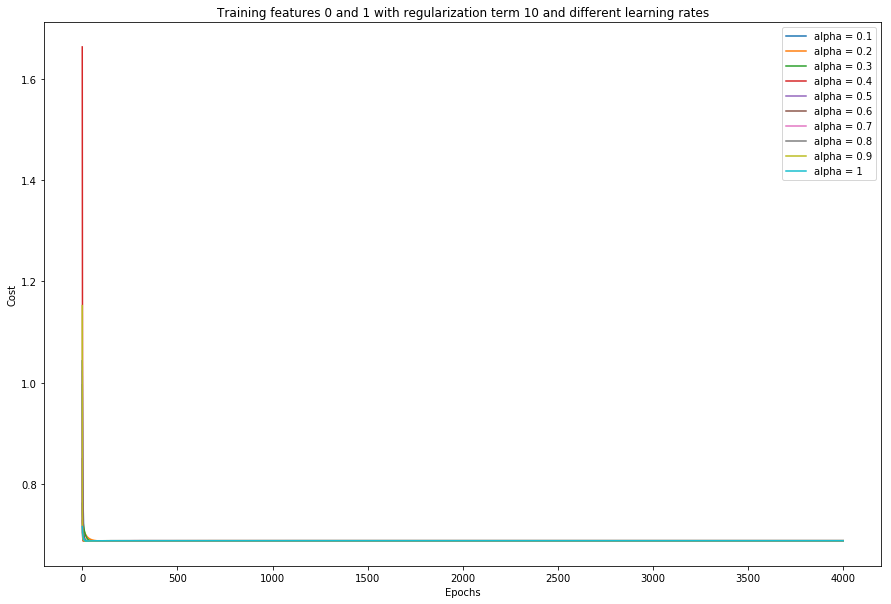

The cost in epoch 0 was 0.9208673969950476
The cost in epoch 1000 was 0.6911250310820879
The cost in epoch 2000 was 0.6911250310820879
The cost in epoch 3000 was 0.6911250310820879
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8816560619266977
The cost in epoch 1000 was 0.6911250310820879
The cost in epoch 2000 was 0.6911250310820879
The cost in epoch 3000 was 0.6911250310820879
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0156768973564734
The cost in epoch 1000 was 0.6911250310820879
The cost in epoch 2000 was 0.6911250310820879
The cost in epoch 3000 was 0.6911250310820879
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.1646218721098527
The cost in epoch 1000 was 0.6911250310820879
The cost in epoch 2000 was 0.6911250310820879
The cost in epoch 3000 was 0.6911250310820879
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.827656148622875
The cost in epoch 1000 was 0.6911250310820879
The 

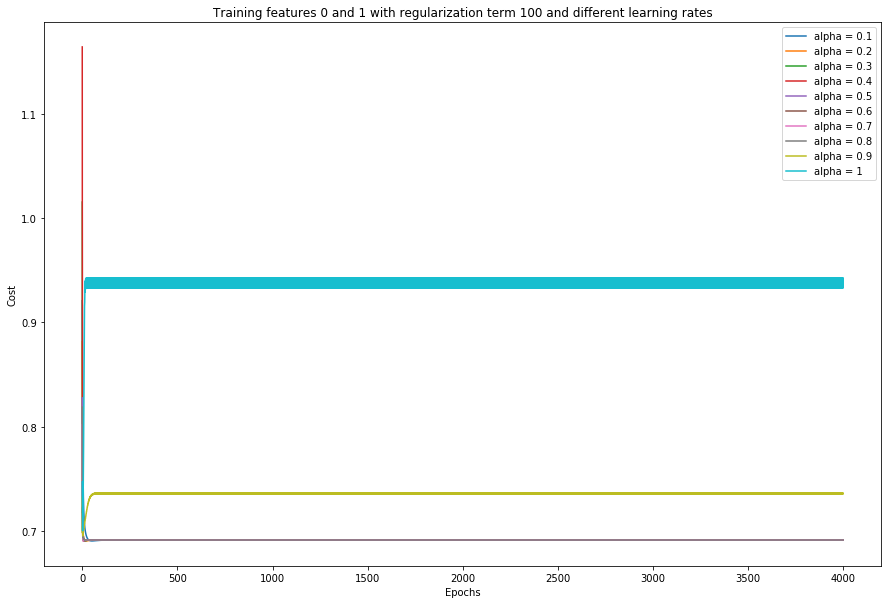

The cost in epoch 0 was 0.6608812412278023
The cost in epoch 1000 was 0.545362264641048
The cost in epoch 2000 was 0.542727527938397
The cost in epoch 3000 was 0.5423261492287474
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7450743304439136
The cost in epoch 1000 was 0.5427674494860434
The cost in epoch 2000 was 0.5422614412540313
The cost in epoch 3000 was 0.5422474334523316
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6274244089063057
The cost in epoch 1000 was 0.5423294625305498
The cost in epoch 2000 was 0.5422474176983728
The cost in epoch 3000 was 0.5422470133094031
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6780812029529729
The cost in epoch 1000 was 0.5422609203309208
The cost in epoch 2000 was 0.5422470231944598
The cost in epoch 3000 was 0.5422470112609945
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6847149090819635
The cost in epoch 1000 was 0.5422492183149848
The c

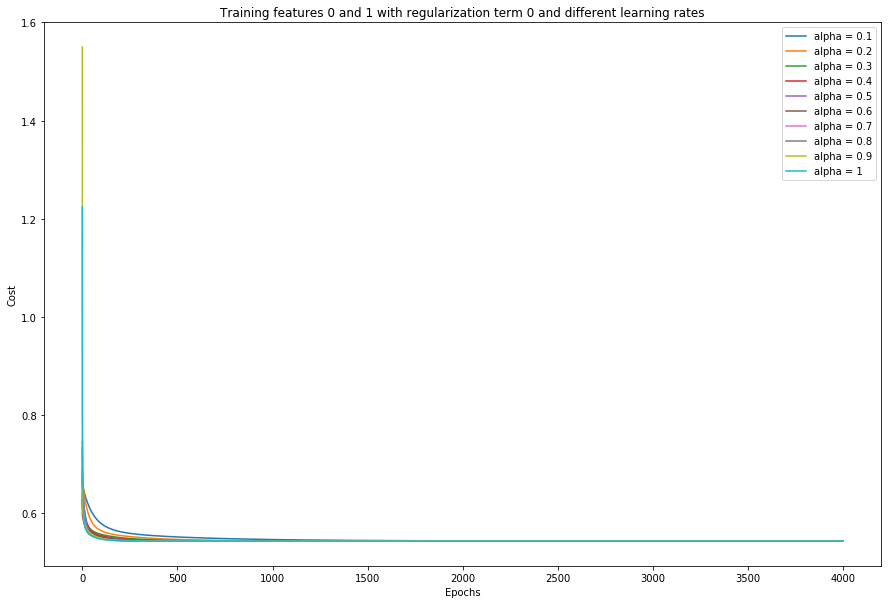

The cost in epoch 0 was 0.9258387319643528
The cost in epoch 1000 was 0.5534963566864107
The cost in epoch 2000 was 0.5508365516234616
The cost in epoch 3000 was 0.5503031962897571
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.2044725634655074
The cost in epoch 1000 was 0.5508578907294287
The cost in epoch 2000 was 0.5501814941734394
The cost in epoch 3000 was 0.550144147165314
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7059576713533181
The cost in epoch 1000 was 0.550302490532031
The cost in epoch 2000 was 0.5501440677288149
The cost in epoch 3000 was 0.5501418768009607
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.2132272729618212
The cost in epoch 1000 was 0.5501822897680922
The cost in epoch 2000 was 0.5501419812304036
The cost in epoch 3000 was 0.5501418461424123
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.3271342797278425
The cost in epoch 1000 was 0.5501518590941411
The c

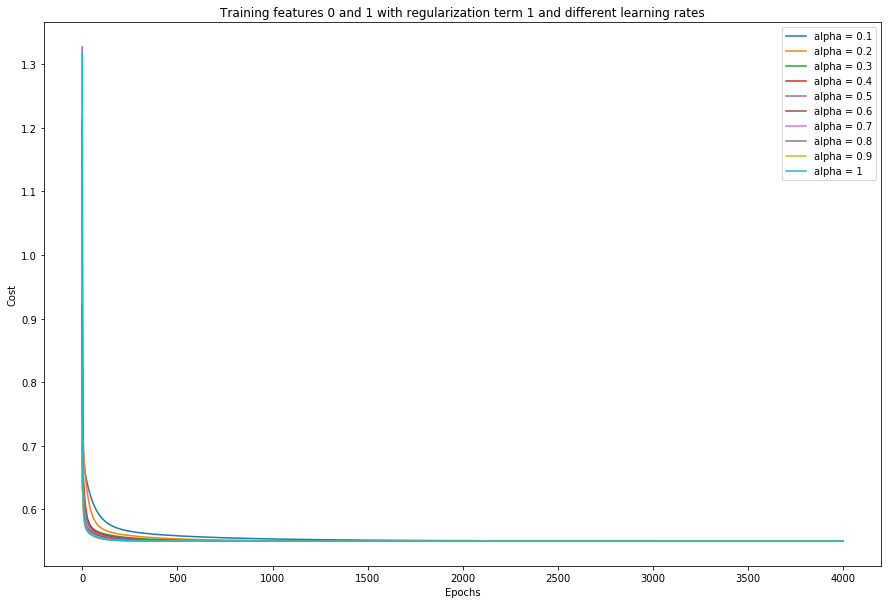

The cost in epoch 0 was 0.819862726883719
The cost in epoch 1000 was 0.6009812024365919
The cost in epoch 2000 was 0.601038594214549
The cost in epoch 3000 was 0.6010389311229779
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6855830093912679
The cost in epoch 1000 was 0.6010384914561291
The cost in epoch 2000 was 0.6010389330948834
The cost in epoch 3000 was 0.601038933109663
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6096531946647347
The cost in epoch 1000 was 0.6010389315774443
The cost in epoch 2000 was 0.601038933109663
The cost in epoch 3000 was 0.6010389331096633
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.2489224565758112
The cost in epoch 1000 was 0.6010389331098548
The cost in epoch 2000 was 0.6010389331096635
The cost in epoch 3000 was 0.6010389331096635
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7979676114272364
The cost in epoch 1000 was 0.6010389331096151
The cos

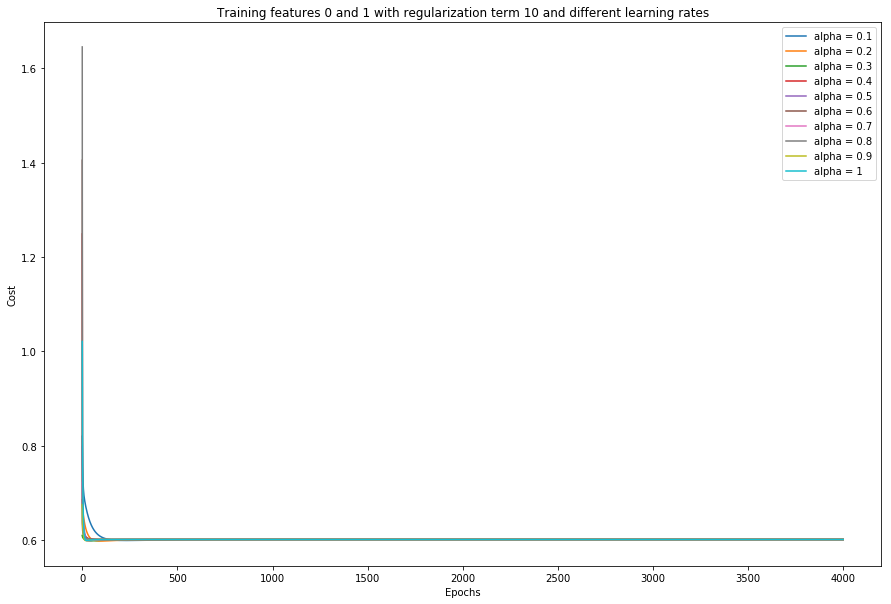

The cost in epoch 0 was 0.7222472665454566
The cost in epoch 1000 was 0.6691838725000938
The cost in epoch 2000 was 0.6691838725000938
The cost in epoch 3000 was 0.6691838725000938
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7442360165001749
The cost in epoch 1000 was 0.6691838725000938
The cost in epoch 2000 was 0.6691838725000938
The cost in epoch 3000 was 0.6691838725000938
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0208429654091105
The cost in epoch 1000 was 0.6691838725000938
The cost in epoch 2000 was 0.6691838725000938
The cost in epoch 3000 was 0.6691838725000938
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.254932573793574
The cost in epoch 1000 was 0.6691838725000938
The cost in epoch 2000 was 0.6691838725000938
The cost in epoch 3000 was 0.6691838725000938
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7673856265703775
The cost in epoch 1000 was 0.6691838725000938
The 

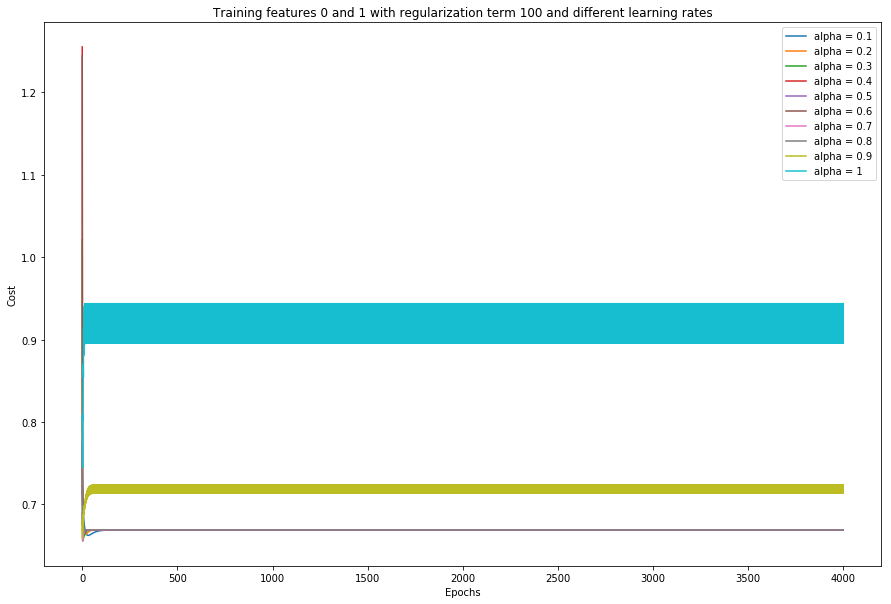

The cost in epoch 0 was 1.4157755146252815
The cost in epoch 1000 was 0.5428197268399777
The cost in epoch 2000 was 0.5386354430079161
The cost in epoch 3000 was 0.5381964830512203
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6768763095707455
The cost in epoch 1000 was 0.5385829673587025
The cost in epoch 2000 was 0.5381432541145361
The cost in epoch 3000 was 0.5381366429679144
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.668162536665326
The cost in epoch 1000 was 0.5381890695089186
The cost in epoch 2000 was 0.5381366402044676
The cost in epoch 3000 was 0.5381365349519277
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.5705975923987632
The cost in epoch 1000 was 0.5381440317468881
The cost in epoch 2000 was 0.5381365366779286
The cost in epoch 3000 was 0.5381365347346652
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6284985969307462
The cost in epoch 1000 was 0.5381373425130443
The 

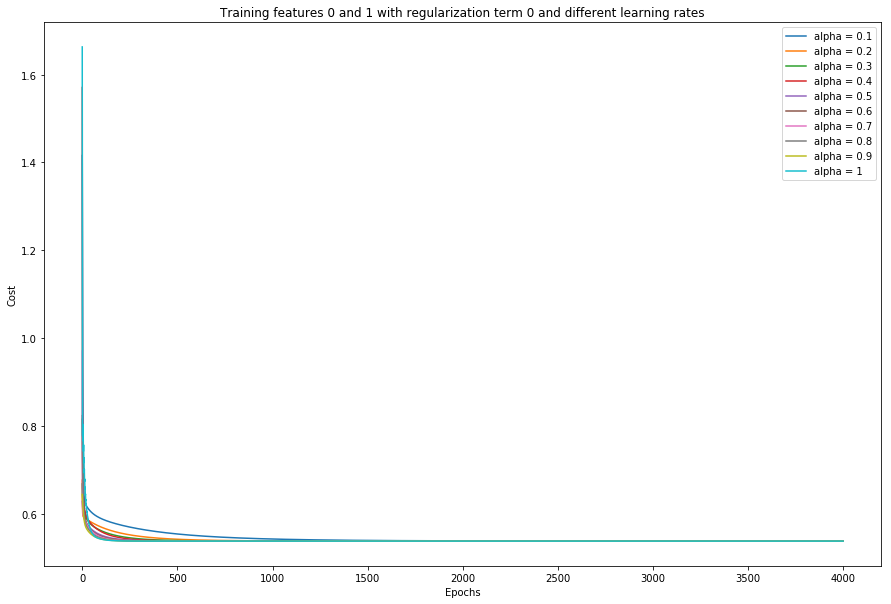

The cost in epoch 0 was 1.356437140000839
The cost in epoch 1000 was 0.5515352401601809
The cost in epoch 2000 was 0.5475763078764341
The cost in epoch 3000 was 0.5469797452306524
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7055610735735741
The cost in epoch 1000 was 0.5474856931092001
The cost in epoch 2000 was 0.5468688674358383
The cost in epoch 3000 was 0.5468477393328706
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.623934658335224
The cost in epoch 1000 was 0.5469818185141481
The cost in epoch 2000 was 0.5468478564159874
The cost in epoch 3000 was 0.5468469635302924
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6131072835691251
The cost in epoch 1000 was 0.5468688299241546
The cost in epoch 2000 was 0.5468469850660259
The cost in epoch 3000 was 0.5468469575176449
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.5148410540942507
The cost in epoch 1000 was 0.546851609405987
The co

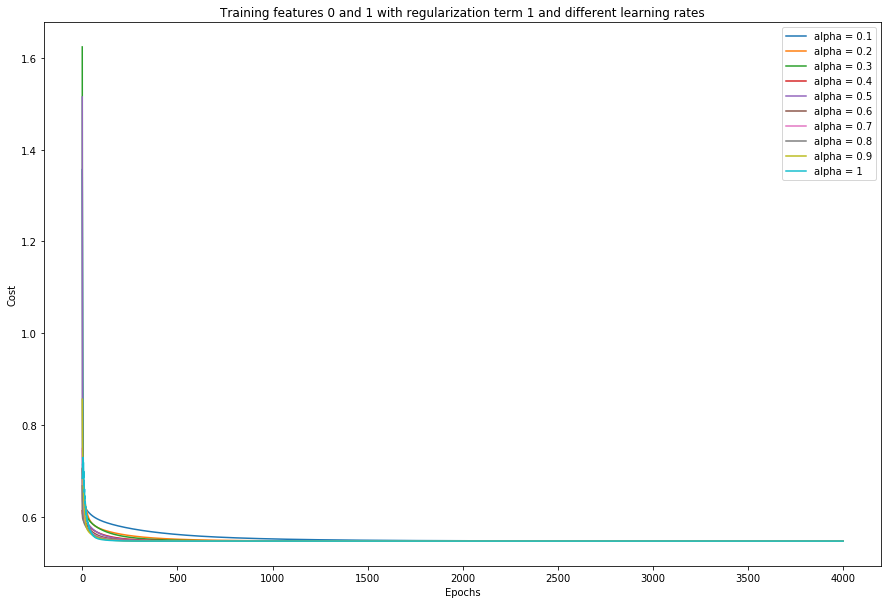

The cost in epoch 0 was 0.6683636551752348
The cost in epoch 1000 was 0.6048939964372799
The cost in epoch 2000 was 0.6048864072768495
The cost in epoch 3000 was 0.6048863785159101
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9687407429483534
The cost in epoch 1000 was 0.6048864660565149
The cost in epoch 2000 was 0.6048863784077123
The cost in epoch 3000 was 0.6048863784064923
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9060649001140268
The cost in epoch 1000 was 0.6048863786243655
The cost in epoch 2000 was 0.6048863784064924
The cost in epoch 3000 was 0.6048863784064924
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6984394926217551
The cost in epoch 1000 was 0.6048863784059604
The cost in epoch 2000 was 0.6048863784064921
The cost in epoch 3000 was 0.6048863784064921
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7126756840048697
The cost in epoch 1000 was 0.6048863784064936
The

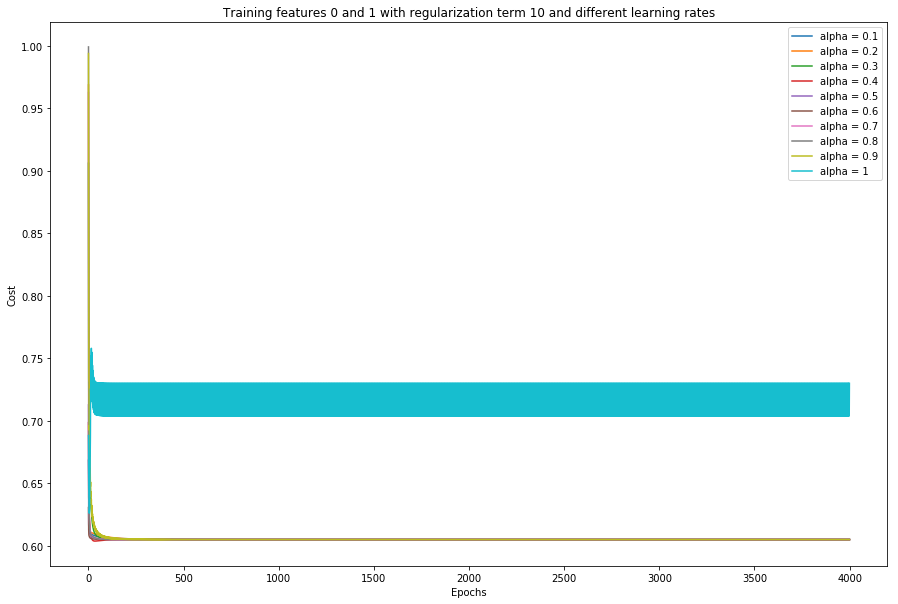

The cost in epoch 0 was 0.8705949583573735
The cost in epoch 1000 was 0.6709663764623751
The cost in epoch 2000 was 0.6709663764623751
The cost in epoch 3000 was 0.6709663764623751
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.4669417251849923
The cost in epoch 1000 was 0.6709663764623751
The cost in epoch 2000 was 0.6709663764623751
The cost in epoch 3000 was 0.6709663764623751
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9189599553112587
The cost in epoch 1000 was 0.6709663764623751
The cost in epoch 2000 was 0.6709663764623751
The cost in epoch 3000 was 0.6709663764623751
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0657090831147757
The cost in epoch 1000 was 0.6709663764623751
The cost in epoch 2000 was 0.6709663764623751
The cost in epoch 3000 was 0.6709663764623751
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.679141228135954
The cost in epoch 1000 was 0.6709663764623751
The 

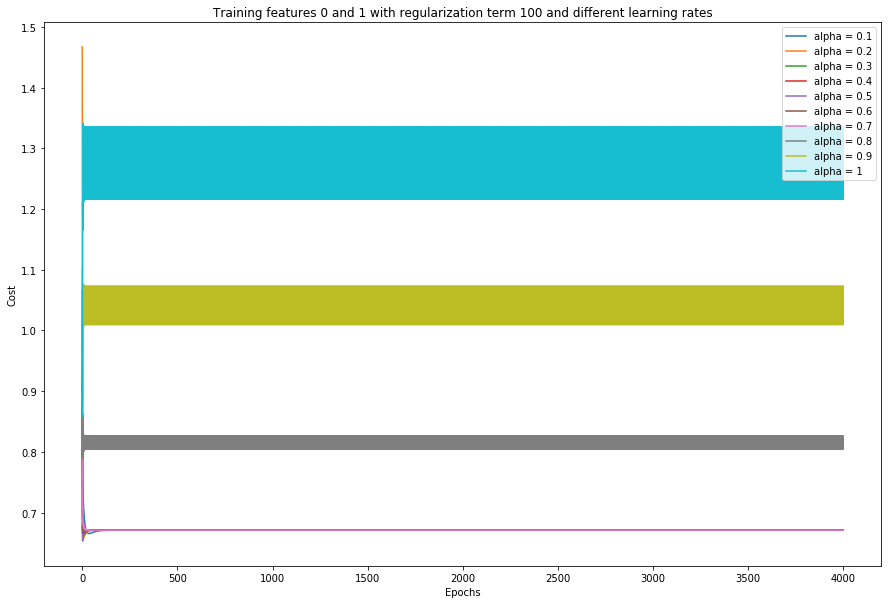

The cost in epoch 0 was 0.7650083383679297
The cost in epoch 1000 was 0.6862816953126574
The cost in epoch 2000 was 0.6862157722992912
The cost in epoch 3000 was 0.6862111680439188
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.9205272583111993
The cost in epoch 1000 was 0.6862189334468073
The cost in epoch 2000 was 0.6862108628985746
The cost in epoch 3000 was 0.6862108240035658
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8255220174127211
The cost in epoch 1000 was 0.6862113117893724
The cost in epoch 2000 was 0.6862108239775436
The cost in epoch 3000 was 0.6862108238156378
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7301092157532371
The cost in epoch 1000 was 0.686210829937962
The cost in epoch 2000 was 0.6862108238157235
The cost in epoch 3000 was 0.686210823815584
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7376116224226084
The cost in epoch 1000 was 0.6862108238199304
The c

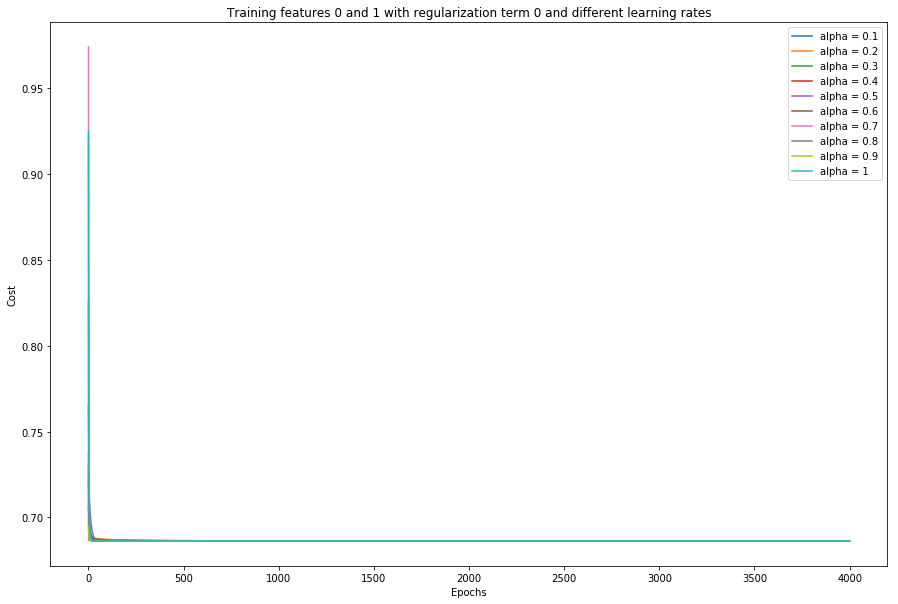

The cost in epoch 0 was 0.6883435323063861
The cost in epoch 1000 was 0.686371250049727
The cost in epoch 2000 was 0.6864688718288334
The cost in epoch 3000 was 0.6864932100348993
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.1646003529430358
The cost in epoch 1000 was 0.6864903252392737
The cost in epoch 2000 was 0.6864984708299866
The cost in epoch 3000 was 0.6864987300314556
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.6922294271831265
The cost in epoch 1000 was 0.6864936909809517
The cost in epoch 2000 was 0.6864987102632965
The cost in epoch 3000 was 0.6864987382791481
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7222929018695383
The cost in epoch 1000 was 0.6864981072909944
The cost in epoch 2000 was 0.6864987378200449
The cost in epoch 3000 was 0.6864987384345306
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.8025729027277427
The cost in epoch 1000 was 0.6864986299770504
The 

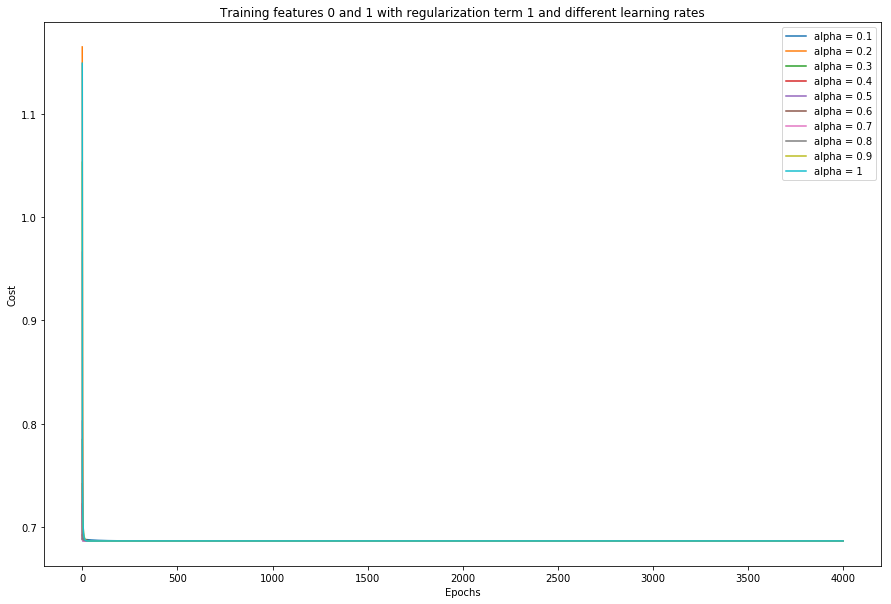

The cost in epoch 0 was 0.850495311678406
The cost in epoch 1000 was 0.6888328699474784
The cost in epoch 2000 was 0.6888757023188786
The cost in epoch 3000 was 0.6888759356983866
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.3327867897395322
The cost in epoch 1000 was 0.6888758273974447
The cost in epoch 2000 was 0.6888759369648667
The cost in epoch 3000 was 0.6888759369679875
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7027673356553644
The cost in epoch 1000 was 0.6888759359366247
The cost in epoch 2000 was 0.6888759369679875
The cost in epoch 3000 was 0.6888759369679877
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7304770639037949
The cost in epoch 1000 was 0.6888759369643128
The cost in epoch 2000 was 0.6888759369679877
The cost in epoch 3000 was 0.6888759369679877
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7769278753463573
The cost in epoch 1000 was 0.6888759369679717
The 

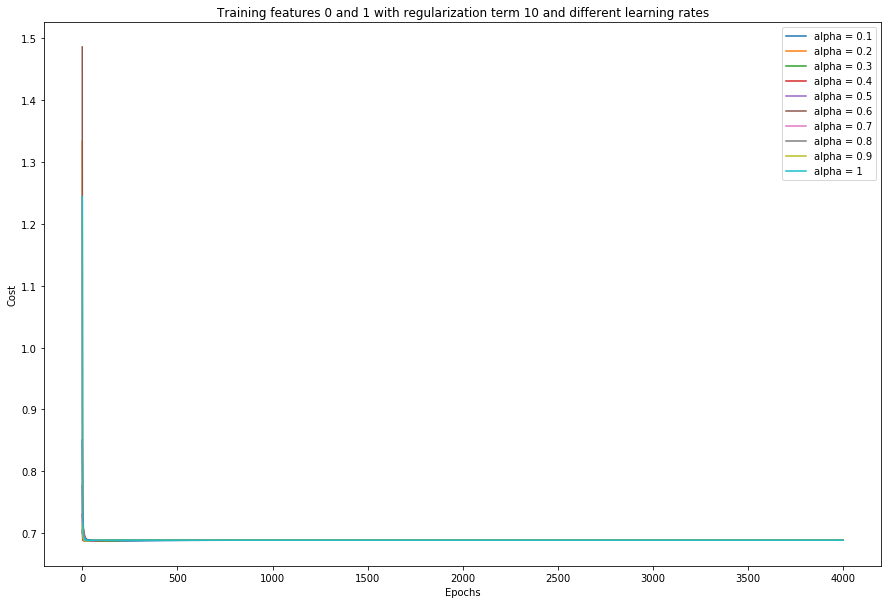

The cost in epoch 0 was 1.1691326267600155
The cost in epoch 1000 was 0.6917125158296178
The cost in epoch 2000 was 0.6917125158296178
The cost in epoch 3000 was 0.6917125158296178
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.0308100191790996
The cost in epoch 1000 was 0.6917125158296178
The cost in epoch 2000 was 0.6917125158296178
The cost in epoch 3000 was 0.6917125158296178
Finished training, trained during 4000 epochs
The cost in epoch 0 was 1.2662862532075307
The cost in epoch 1000 was 0.6917125158296178
The cost in epoch 2000 was 0.6917125158296178
The cost in epoch 3000 was 0.6917125158296178
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.7210476401784903
The cost in epoch 1000 was 0.6917125158296178
The cost in epoch 2000 was 0.6917125158296178
The cost in epoch 3000 was 0.6917125158296178
Finished training, trained during 4000 epochs
The cost in epoch 0 was 0.981040997132986
The cost in epoch 1000 was 0.6917125158296178
The 

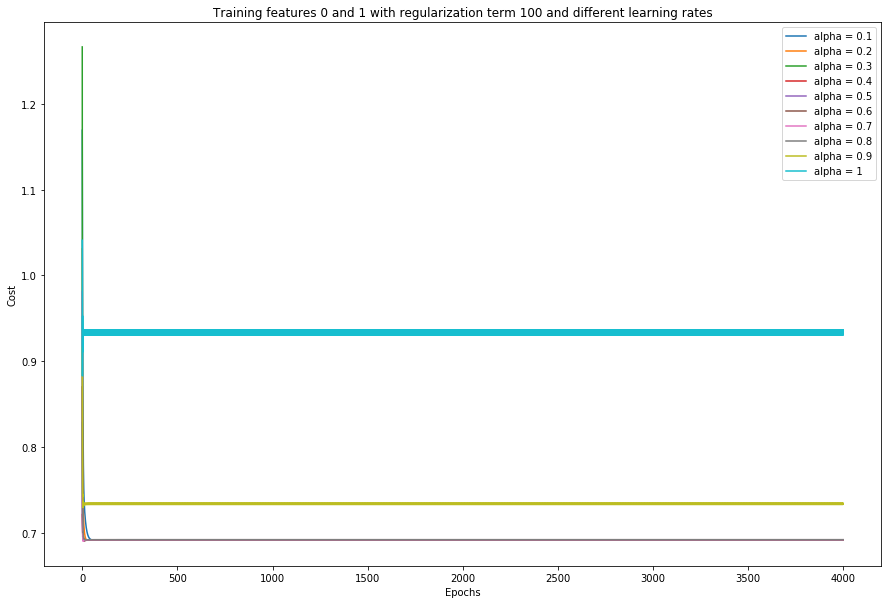

In [23]:
alphas=[0.1, 0.2, 0.3, 0.4,0.5, 0.6, 0.7, 0.8, 0.9, 1] #Learning rate
lambdas=[0, 1, 10, 100] #Regularization term
for f1 in range(0, 4):  #1st feature
    for f2 in range(f1 + 1, 4):  #2nd feature
        train, test = generate_data_with_features(monk, elements=346, features=[f1, f2], normalise=True, test_elements=test_elements)
        for l in lambdas:
            for i in range(0,10):
                weights, bias, costs = train_model(train, epochs=int(4000), learning_rate=alphas[i], regularization_term=l)
                p=plt.plot(costs, label='alpha = '+str(alphas[i]))
                plt.xlabel('Epochs')
                plt.ylabel('Cost')
            plt.title('Training features 0 and 1 with regularization term '+str(l)+' and different learning rates')
            plt.legend()
            plt.show()

As before, we provide a code to choose the features of the data set and the parameters of the model

The cost in epoch 0 was 0.7885581561800559
The cost in epoch 1000 was 0.6904055161306233
Finished training, trained during 2000 epochs


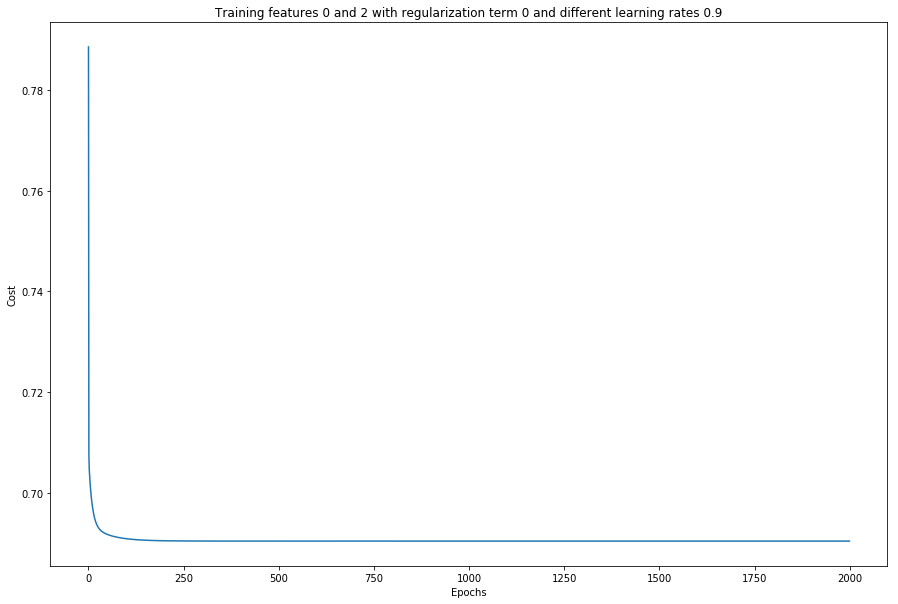

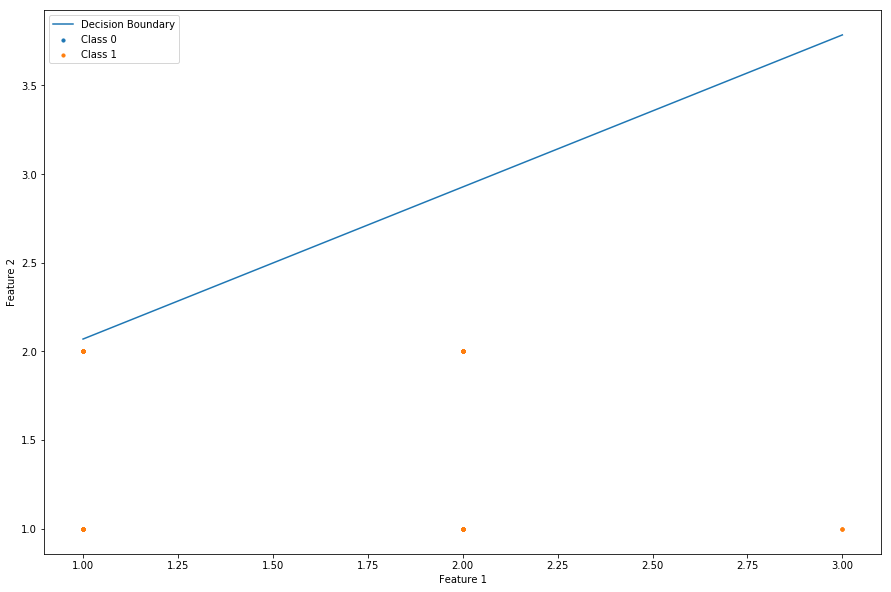

Train error of the model is 0.5307692307692308
Test error of the model is 0.7441860465116279


In [24]:
#Define the parameters
alphas=0.9
lambdas=0
epochs=2000

#Define features
f1=0
f2=2

train, test = generate_data_with_features(monk, elements=346, features=[f1, f2], normalise=True, test_elements=test_elements)
weights, bias, costs = train_model(train, epochs=int(epochs), learning_rate=alphas, regularization_term=lambdas)

trainx,trainy=train


#Plot the cost
plt.plot(costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training features '+str(f1)+' and '+str(f2)+' with regularization term '+str(lambdas)+' and different learning rates '+str(alphas))
plt.savefig('figure with features '+str(f1)+str(f2)+'and lambda'+str(lambdas))
plt.show()

#Plot the decision boundary
plot_boundary(trainx.to_numpy(), trainy.to_numpy(), weights=weights, bias=bias, str_id='monk_jp')
plt.show()

#Accuracy
print('Train error of the model is '+str(test_model(train, weights, bias)))
print('Test error of the model is '+str(test_model(test, weights, bias)))